# **Covers de un Siglo Pasado - Década del 70.**

# 0 - Introducción.

En este trabajo, se realizó el análisis de un *dataset* que contiene canciones de la década de 1970. El análisis realizado contempla:
- La limpieza de la información.
- El estudio (individual y grupal) de las distintas variables.
- El modelado y predicción del conjunto de características.
- La propuesta de hipótesis y su validación.

## 0.1 - Importación de Librerías.

Para trabajar con los datos, se utilizaron las siguientes librerías:

In [300]:
# Generales, usadas a lo largo de toda la notebook.
import re
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# 2.1. Análisis Univariado.
from wordcloud import WordCloud as wd
from lingua import Language, LanguageDetectorBuilder

# 2.2. Análisis Bivariado.
from scipy.optimize import curve_fit

# 2.3. Análisis Multivariado.
import umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 3. Modelado y Predicción.
import statsmodels.api as sm

# 3.1. Regresión Lineal Múltiple.
from sklearn.model_selection import train_test_split

# 3.2. Regresión Polinómica.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 3.3. Árboles de Decisión y Random Forest.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# 4. Test de Hipótesis.
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import wilcoxon


## 0.2 - ¿De qué manera se accedió a los datos?

El dataset fue brindado por la cátedra de la materia Fundamentos de la Ciencia de Datos.

In [301]:
# Lectura del dataset.
raw_dataset = pd.read_csv("Datasets/Originales/Covers.csv")

Adicionalmente, se utilizó el dataset [Spotify Dataset](https://github.com/ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020/blob/master/Spotify_160k_1921_2020_analysis.ipynb), el cual cuenta con nuestros datos extendidos para los años dentros del rango [1920, 2020]. Durante el transcurso del trabajo, se referenciará a este *dataset* como ***dataset* extentendido**.

In [302]:
# Lectura del dataset extendido.
spotify_dataset = pd.read_csv("Datasets/Originales/Spotify_Data.csv")

## 0.3 - ¿De qué datos se disponen?

El *dataset* original dispone de 980 registros (filas) y de 17 variables (columnas).

In [303]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

Las variables que podemos hallar en él son:

- ```Track```: texto libre que representa el nombre de la pista.
- ```Artist```: texto libre que representa el nombre del artista.
- ```Duration```: variable con formato string, cuantitativa, que representa la duración de la pista en minutos.
- ```Time_Signature```: variable cualitativa ordinal que representa el numero de pulsaciones por compás.
- ```Danceability```: variable cuantitativa continua que representa qué tan bailable es una cancion, basada en el tempo y en la estabilidad y fuerza del ritmo
- ```Energy```: variable cuantitativa que representa una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.
- ```Key```: variable cuantitativa que representa la tonalidad musical en la que está compuesta la canción, representada por un número entero.
- ```Loudness```: variable cuantitativa que representa el volumen promedio de la canción, medido en decibelios (dB).
- ```Mode```: variable cualitativa binaria que representa la modalidad de la pista. Indica si la canción está en tono mayor o menor.
- ```Speechiness```: variable cuantitativa que representa la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.
- ```Acousticness```: variable cuantitativa que representa una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.
- ```Instrumentalness```: variable cuantitativa que la presencia de voces, valores más altos representan pistas más instrumentales.
- ```Liveness```: variable cuantitativa que representa una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.
- ```Valence```: Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.
- ```Tempo```: la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).
- ```Popularity```: una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.
- ```Year```: el año en que se lanzó la canción.

Por otro lado, el *dataset* extendido cuenta con aproximadamente 170 000 registros y 19 variables:

In [304]:
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

Las columnas con las que cuenta son las siguientes:
- ```id```: variable cuantitativa que indica la ID de la canción en Spotify.
- ```name```: equivalente a la variable *Track* en el *dataset* original.
- ```artists```: lista de texto libre que representa a los artistas de la pista.
- ```duration_ms```: variable cuantitativa que indica la duración de la pista en milisegundos.
- ```release_date```: variable que indica la fecha de lanzamiento de la pista.
- ```year```: equivalente a la variable *Year* en el *dataset* original. Coincide con el año expresado en la variable *realese_date*.
- ```explicit```: variable binaria que indica si la canción es explícita (contiene vocabulario inadecuado o abarca temas adultos).

Además de las anteriormente mencionadas, cuenta con las variables ```acousticness```, ```danceability```, ```energy```, ```instrumentalness```, ```liveness```, ```loudness```, ```speechiness```, ```tempo```, ```valence```, ```key```, ```mode``` y ```popularity```; las cuales equivalen a las variables del mismo nombre en el *dataset* original.

# 1 - Limpieza de los Datos.

Previo al análisis, se realizó una limpieza de los datos, eliminando así información errónea. Para esto, se realizaron varios barridos completos del *dataset*, al igual que se utilizaron funciones proporcionadas por las librerías importadas para su detección y corrección. A su vez, para algunas variables, se vio conveniente la realización de un preprocesamiento con la finalidad de facilitar su análisis. 

## 1.1 - Limpieza del *Dataset* Original.

Con la finalidad de preservar el *dataset* original tal y como fue cargado, se realizó en una variable una copia de este:

In [305]:
clean_dataset = raw_dataset.copy()

### Duplicados.

Se hallaron canciones duplicadas en las que variaba en uno el año de lanzamiento:

In [306]:
filas_duplicadas = clean_dataset[clean_dataset.duplicated(subset=["Track", "Artist"], keep=False)].sort_values("Track")

filas_duplicadas

Track              Artist Duration  \
776  Don’t It Make My Brown Eyes Blue       Crystal Gayle     2:38   
876  Don’t It Make My Brown Eyes Blue       Crystal Gayle     2:38   
684             How Deep Is Your Love            Bee Gees     3:32   
783             How Deep Is Your Love            Bee Gees     3:32   
854              I Love The Nightlife      Alicia Bridges     3:07   
956              I Love The Nightlife      Alicia Bridges     3:07   
662                      Muskrat Love  Captain & Tennille     3:48   
762                      Muskrat Love  Captain & Tennille     3:48   
739              You Light Up My Life         Debby Boone     3:36   
835              You Light Up My Life         Debby Boone     3:36   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
776               4         0.587   0.237    6   -16.541     1       0.0407   
876               4         0.587   0.237    6   -16.541     1       0.0407   
684               4         0.738   0.868   11    -4.373     0       0.0731   
783               4         0.738   0.868   11    -4.373     0       0.0731   
854               4         0.693   0.708    0    -7.816     1       0.0310   
956               4         0.693   0.708    0    -7.816     1       0.0310   
662               4         0.659   0.257    9   -16.552     1       0.0382   
762               4         0.659   0.257    9   -16.552     1       0.0382   
739               3         0.333   0.367    2   -10.060     1       0.0291   
835               3         0.333   0.367    2   -10.060     1       0.0291   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
776        0.4990          0.000001    0.6140   0.3680   85.383           7   
876        0.4990          0.000001    0.6140   0.3680   85.383           7   
684        0.0392          0.001690    0.3880   0.3360  122.003          83   
783        0.0392          0.001690    0.3880   0.3360  122.003          83   
854        0.3090          0.003050    0.0857   0.9490  125.315          48   
956        0.3090          0.003050    0.0857   0.9490  125.315          48   
662        0.8900          0.000140    0.2520   0.2220  102.977          41   
762        0.8900          0.000140    0.2520   0.2220  102.977          41   
739        0.8310          0.000012    0.2620   0.0685   77.986          55   
835        0.8310          0.000012    0.2620   0.0685   77.986          55   

     Year  
776  1977  
876  1978  
684  1977  
783  1978  
854  1978  
956  1979  
662  1976  
762  1977  
739  1977  
835  1978

Manualmente, se verificó cada uno de los registros duplicados y se eliminaron aquellos incorrectos. Las entradas correctas son coincidentes con la primera aparición de la canción en el dataset.

In [307]:
# Las entradas correctas son coincidentes con la primera aparición de la canción en el dataset.
# Por lo tanto, se eliminan los duplicados y se conserva únicamente la primera aparición mediante "keep='first'"".
clean_dataset = clean_dataset.drop_duplicates(subset=["Track", "Artist"], keep="first")

clean_dataset

Track              Artist Duration  \
0                                           Abc       The Jackson 5     2:42   
1                                     Let It Be         The Beatles     4:03   
2                               I Want You Back       The Jackson 5     2:56   
3                                       Cecilia   Simon & Garfunkel     2:54   
4                             Spirit In The Sky    Norman Greenbaum     4:02   
..                                          ...                 ...      ...   
975                    He’s The Greatest Dancer       Sister Sledge     6:15   
976                          Don’t Cry Out Loud  Melissa Manchester     2:15   
977  When You’re In Love With A Beautiful Woman            Dr. Hook     2:54   
978              I’ll Never Love This Way Again      Dionne Warwick     2:58   
979                          Dim All The Nights        Donna Summer     4:08   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[975 rows x 17 columns]

Se hallaron también registros con el mismo nombre de pista. Al analizarlos, resulta que ambas pistas existen: su nombre, artista y año son correctos. No obstante, los valores en las demás columnas están repetidos, perteneciente a una de las canciones o a ninguna de las dos.

In [308]:
filas_duplicadas = clean_dataset[clean_dataset.duplicated(subset=["Track"], keep=False)].sort_values("Track")

filas_duplicadas


Track  \
497                                    Best Of My Love   
701                                    Best Of My Love   
15                          Bridge Over Troubled Water   
101                         Bridge Over Troubled Water   
514                                      Dance With Me   
819                                      Dance With Me   
410                              Feel Like Makin’ Love   
509                              Feel Like Makin’ Love   
903                                               Fire   
495                                               Fire   
628                        Got To Get You Into My Life   
833                        Got To Get You Into My Life   
282  I’d Like To Teach The World To Sing (IN Perfec...   
281  I’d Like To Teach The World To Sing (IN Perfec...   
890                                               Lady   
485                                               Lady   
134                              Never Can Say Goodbye   
529                              Never Can Say Goodbye   
399                                          On And On   
702                                          On And On   

                       Artist Duration  Time_Signature  Danceability  Energy  \
497                    Eagles     3:40               4         0.784   0.713   
701              The Emotions     3:40               4         0.784   0.713   
15          Simon & Garfunkel     4:53               4         0.149   0.206   
101           Aretha Franklin     4:53               4         0.149   0.206   
514                   Orleans     3:51               4         0.912   0.511   
819               Peter Brown     3:51               4         0.912   0.511   
410             Roberta Flack     5:13               4         0.543   0.529   
509               Bad Company     5:13               4         0.543   0.529   
903       The Pointer Sisters     3:47               4         0.638   0.831   
495              Ohio Players     3:47               4         0.638   0.831   
628               The Beatles     2:29               4         0.521   0.524   
833        Earth, Wind & Fire     2:29               4         0.521   0.524   
282           The New Seekers     2:30               4         0.645   0.311   
281      The Hillside Singers     2:30               4         0.645   0.311   
890         Little River Band     3:03               4         0.539   0.160   
485                      Styx     3:03               4         0.539   0.160   
134             The Jackson 5     2:59               4         0.527   0.821   
529             Gloria Gaynor     2:59               4         0.527   0.821   
399  Gladys Knight & the Pips     7:26               3         0.438   0.687   
702            Stephen Bishop     7:26               3         0.438   0.687   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
497    0    -6.865     1       0.0339      0.447000          0.140000   
701    0    -6.865     1       0.0339      0.447000          0.140000   
15     3   -13.888     1       0.0323      0.822000          0.000649   
101    3   -13.888     1       0.0323      0.822000          0.000649   
514    9    -6.365     1       0.2030      0.025900          0.000000   
819    9    -6.365     1       0.2030      0.025900          0.000000   
410    7    -9.717     1       0.0301      0.326000          0.002690   
509    7    -9.717     1       0.0301      0.326000          0.002690   
903    8    -5.039     1       0.0490      0.142000          0.000000   
495    8    -5.039     1       0.0490      0.142000          0.000000   
628    0    -6.136     1       0.0302      0.420000          0.000009   
833    0    -6.136     1       0.0302      0.420000          0.000009   
282   11   -12.264     1       0.0342      0.810000          0.000000   
281   11   -12.264     1       0.0342      0.810000          0.000000   
890    3   -13.285     1       0.0329      0.881000   

Para el análisis de las variables *Track*, *Artist* y *Year*, los registros son útiles, ya que representan datos reales. No obstante, para el análisis de las demás variables, introducen ruido. Con la finalidad de utilizar la información que proporcionan sin aportar ruido a otras variables, se optó por apartarlos del *dataset* limpio a la vez que se los tiene almacenados en una variable auxiliar para cuando que, cuando sea conveniente, puedan ser utilizados.

In [309]:
# Guardado de los registros auxiliares.
registros_auxiliares = filas_duplicadas

# Eliminación del dataset de los registros auxiliares.
clean_dataset = clean_dataset.drop(registros_auxiliares.index)

### Pistas que contienen la palabra *by*.

Se detectaron canciones inexistentes y con artistas extraños.

In [310]:
# Canciones inexistentes detectadas.
indices = [187, 248, 583, 723]

clean_dataset.loc[indices]


Track          Artist Duration  Time_Signature  Danceability  Energy  \
187     Down  THE LAZY RIVER     4:21               4         0.541   0.366   
248   Betcha      GOLLY, WOW     4:13               4         0.430   0.560   
583      All          MYSELF     3:38               4         0.585   0.550   
723  Blinded       THE LIGHT     7:08               4         0.456   0.696   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
187   11   -10.412     1       0.0748         0.560          0.000001   
248    3    -9.620     1       0.0268         0.362          0.000107   
583   11    -7.342     1       0.0255         0.408          0.000040   
723    5   -10.000     1       0.0653         0.291          0.000207   

     Liveness  Valence    Tempo  Popularity  Year  
187    0.0946    0.168  159.707          82  1972  
248    0.4950    0.391   72.238          50  1972  
583    0.1150    0.839   78.176          81  1976  
723    0.0853    0.508  142.156          64  1977

En todas ellas, el texto que figura en la variable *Artist* es en realidad parte del nombre de la pista. Además, casualmente, la separación está realizada a partir de la palabra *by*, la cual conforma también el nombre de la pista. Con esto en cuenta, se halló el artista de cada pista y se realizó la corrección de la información:

In [311]:
# Correción del nombre de la pista.
clean_dataset.loc[indices, "Track"] = ["Down by the Lazy River", "Betcha By Golly, Wow", "All by Myself", "Blinded by The Light"]

# Corrección del nombre del artista.
clean_dataset.loc[indices, "Artist"] = ["The Osmonds", "The Stylistics", "Eric Carmen", "Manfred Mann"]

clean_dataset.loc[indices]

Track          Artist Duration  Time_Signature  \
187  Down by the Lazy River     The Osmonds     4:21               4   
248    Betcha By Golly, Wow  The Stylistics     4:13               4   
583           All by Myself     Eric Carmen     3:38               4   
723    Blinded by The Light    Manfred Mann     7:08               4   

     Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
187         0.541   0.366   11   -10.412     1       0.0748         0.560   
248         0.430   0.560    3    -9.620     1       0.0268         0.362   
583         0.585   0.550   11    -7.342     1       0.0255         0.408   
723         0.456   0.696    5   -10.000     1       0.0653         0.291   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
187          0.000001    0.0946    0.168  159.707          82  1972  
248          0.000107    0.4950    0.391   72.238          50  1972  
583          0.000040    0.1150    0.839   78.176          81  1976  
723          0.000207    0.0853    0.508  142.156          64  1977

### Pistas dobles.

Se hallaron registros en los que se especificaba el nombre de dos pistas en lugar de una:

In [312]:
pistas_dobles = clean_dataset[clean_dataset["Track"].str.contains("/")]

pistas_dobles

Track                        Artist  \
87                 Come Together / Something *                   The Beatles   
89       Whole Lotta Love / Living Loving Maid                  Led Zeppelin   
121                Uncle Albert/Admiral Halsey        Paul & Linda McCartney   
181               Maggie May/Reason To Believe                   Rod Stewart   
184  Have You Ever Seen The Rain / Hey Tonight  Creedence Clearwater Revival   
553                One Man Woman/One Woman Man       Paul Anka & Odia Coates   
564            The Way We Were/Try To Remember      Gladys Knight & the Pips   
676                   Beth / Detroit Rock City                          Kiss   
766               Star Wars Theme/Cantina Band                          Meco   
867      We Will Rock You/We Are The Champions                         Queen   
974                       The Main Event/Fight              Barbra Streisand   

    Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
87      4:17               4         0.524   0.364    9   -12.551     0   
89      5:13               4         0.297   0.934    1    -5.606     1   
121     4:55               4         0.371   0.507    7    -9.805     1   
181     5:50               4         0.566   0.585    2    -8.733     1   
184     2:38               4         0.735   0.556    0    -5.863     1   
553     4:32               4         0.627   0.645   11    -6.820     1   
564     4:31               4         0.285   0.265    7   -12.542     1   
676     2:48               4         0.453   0.286    0   -11.403     1   
766     3:32               4         0.677   0.915    0    -3.859     1   
867     3:51               3         0.281   0.634    0    -5.808     1   
974     4:53               4         0.647   0.875    7    -8.503     1   

     Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
87        0.0310      0.025800          0.433000    0.1320    0.505  167.534   
89        0.0943      0.000274          0.003740    0.7800    0.384   79.781   
121       0.0325      0.580000          0.020100    0.1750    0.535   91.786   
181       0.0362      0.721000          0.517000    0.0911    0.567  129.475   
184       0.0276      0.117000          0.000000    0.0738    0.877  127.983   
553       0.0293      0.045700          0.000000    0.0655    0.509   91.015   
564       0.0418      0.354000          0.000003    0.7440    0.231  147.194   
676       0.0321      0.807000          0.000034    0.2060    0.345  114.003   
766       0.0912      0.001210          0.916000    0.3220    0.545  124.929   
867       0.0391      0.236000          0.000013    0.0386    0.329   95.248   
974       0.0431      0.050200          0.000000    0.1720    0.684  137.392   

     Popularity  Year  
87           14  1970  
89            0  1970  
121          59  1971  
181           7  1971  
184           0  1971  
553          44  1975  
564          36  1975  
676          11  1976  
766          36  1977  
867          31  1978  
974          25  1979

 Los valores de las demás variables del registro, exceptuando el artista, corresponden a una de las canciones o a ninguna de ellas. Por ejemplo: en el registro 676, si bien la pista *Detroit Rock City* es de Kiss, esta salió en el año 1999 (lo cual nuestro *dataset* no está supuesto a abarcar).

Debido a que la cantidad de registros con estas características es baja y no es posible comprobar la veracidad de todos los datos, se tomó la decisión de eliminarlos:

In [313]:
clean_dataset = clean_dataset.drop(pistas_dobles.index)

clean_dataset

Track              Artist Duration  \
0                                           Abc       The Jackson 5     2:42   
1                                     Let It Be         The Beatles     4:03   
2                               I Want You Back       The Jackson 5     2:56   
3                                       Cecilia   Simon & Garfunkel     2:54   
4                             Spirit In The Sky    Norman Greenbaum     4:02   
..                                          ...                 ...      ...   
975                    He’s The Greatest Dancer       Sister Sledge     6:15   
976                          Don’t Cry Out Loud  Melissa Manchester     2:15   
977  When You’re In Love With A Beautiful Woman            Dr. Hook     2:54   
978              I’ll Never Love This Way Again      Dionne Warwick     2:58   
979                          Dim All The Nights        Donna Summer     4:08   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[944 rows x 17 columns]

### Preprocesamiento.

Se consideró conveniente, para su análisis, la conversión la variable *Duration*, hallada en minutos y expresada mediante un texto, a segundos y expresada mediante un entero:

In [314]:
# División de la duración en una lista con dos elementos: los minutos en el primer índice y los segundos en el segundo.
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].str.split(":")

# Conversión de los minutos y segundos a únicamente segundos.
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Conversión del tipo de dato de "String" a "Int64".
clean_dataset = clean_dataset.astype({"Duration": "Int64"})

clean_dataset.sort_values("Duration", ascending=False)

Track                 Artist  Duration  Time_Signature  \
449          Tubular Bells          Mike Oldfield      1561               4   
645  Love To Love You Baby           Donna Summer      1008               4   
920               Promises           Eric Clapton       646               4   
348            Pillow Talk                 Sylvia       645               4   
846          Feels So Good         Chuck Mangione       582               4   
..                     ...                    ...       ...             ...   
865       What’s Your Name         Lynyrd Skynyrd        87               4   
149    Bring The Boys Home            Freda Payne        87               4   
227           Day Dreaming        Aretha Franklin        80               4   
571               Dynomite  Tony Camillo’s Bazuka        77               4   
643             Happy Days      Pratt and McClain        76               4   

     Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
449         0.374  0.2190    4   -19.104     0       0.0343       0.56400   
645         0.622  0.4250   10   -16.256     1       0.0520       0.29200   
920         0.362  0.4210   10   -11.699     1       0.0372       0.28100   
348         0.919  0.3620    8    -8.331     1       0.3680       0.57600   
846         0.576  0.6030    5    -9.603     1       0.0329       0.45500   
..            ...     ...  ...       ...   ...          ...           ...   
865         0.889  0.4500   11    -6.852     0       0.0357       0.33400   
149         0.330  0.2830    0   -15.971     1       0.0610       0.57500   
227         0.213  0.0751    7   -27.103     1       0.0433       0.97100   
571         0.685  0.4030    0   -10.887     1       0.3050       0.00483   
643         0.212  0.5540    0    -8.352     1       0.0473       0.00325   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
449          0.560000    0.1140   0.0579  103.535          47  1974  
645          0.000057    0.0498   0.4170   96.168          50  1976  
920          0.000062    0.0943   0.2330  114.669          65  1979  
348          0.000000    0.1340   0.4160  104.987          49  1973  
846          0.053700    0.0406   0.5240  103.658          51  1978  
..                ...       ...      ...      ...         ...   ...  
865          0.000000    0.3490   0.7830  112.023          36  1978  
149          0.094700    0.2350   0.2870  157.963          49  1971  
227          0.441000    0.1130   0.0346   85.295          58  1972  
571          0.000000    0.1740   0.5460   93.826          23  1975  
643          0.859000    0.3240   0.6250  137.787          51  1976  

[944 rows x 17 columns]

## 1.2 - Limpieza del *Dataset* Extendido.

### Duplicados.

Al igual que en el *dataset* original, se hallaron pistas duplicadas:

In [315]:
sp_duplicated_rows = spotify_dataset[spotify_dataset.duplicated(subset=["name", "artists"], keep=False)]

sp_duplicated_rows.sort_values("name")

id  \
3       6DdWA7D1o5TU2kXWyCLcch   
4       3vMmwsAiLDCfyc1jl76lQE   
13      5AZvNKWS9yPpXntKqHAhYw   
14      0xVbtHC4BM071oCAYrMxy1   
51      3rG8ZkmKHb4Ms6CsSzEITv   
...                        ...   
169231  0wxSv5S7CslCtUqKfNKboe   
169346  2MEWfpyEfYsj1JhwRqrIgh   
169348  5G2BKVqHNC8yl77fAWybHb   
169610  3xiTfzXJWX1mVRlZDZAtz3   
169611  4DUT4cEcOpwIGaItPAY7Ek   

                                                     name  \
3                                  "40" - Remastered 2008   
4                                  "40" - Remastered 2008   
13      "Carmen Fantasie", by Franz Waxman, based on t...   
14      "Carmen Fantasie", by Franz Waxman, based on t...   
51                       "The Take Over, The Breaks Over"   
...                                                   ...   
169231                                                 心箋   
169346                                              我的一顆心   
169348                                              我的一顆心   
169610                                               相思河畔   
169611                                               相思河畔   

                                                  artists  duration_ms  \
3                                                  ['U2']       157667   
4                                                  ['U2']       157667   
13      ['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...       570920   
14      ['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...       583573   
51                                       ['Fall Out Boy']       213587   
...                                                   ...          ...   
169231                                          ['幸福合唱團']       158853   
169346                                           ['霜華雪華']       208040   
169348                                           ['霜華雪華']       150840   
169610                                           ['霜華雪華']       195560   
169611                                           ['霜華雪華']       199893   

       release_date  year  acousticness  danceability  energy  \
3           2/28/83  1983       0.18500         0.371  0.5450   
4           2/28/83  1983       0.18500         0.371  0.5450   
13             1934  1934       0.94100         0.363  0.1930   
14             1946  1946       0.94300         0.291  0.1980   
51           1/1/07  2007       0.00614         0.609  0.9170   
...             ...   ...           ...           ...     ...   
169231      11/8/65  1965       0.98600         0.550  0.1020   
169346      1/26/63  1963       0.80200         0.484  0.0733   
169348     10/15/65  1965       0.95100         0.503  0.0600   
169610     10/15/65  1965       0.97700         0.636  0.1220   
169611      1/26/63  1963       0.72600         0.408  0.1310   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  \
3               0.582000    0.1830    -9.315       0.0307  150.316    0.310   
4               0.582000    0.1830    -9.315       0.0307  150.316    0.310   
13              0.446000    0.4160   -20.298       0.0438  101.112    0.336   
14              0.380000    0.1940   -19.978       0.0529   71.366    0.341   
51              0.000020    0.0775    -2.563       0.0477  149.948    0.670   
...                  ...       ...       ...          ...      ...      ...   
169231          0.000268    0.1080   -23.583       0.0291   95.057    0.426   
169346          0.000060    0.0803   -21.160       0.0335  136.160    0.452   
169348          0.000000    0.0477   -20.764       0.0383  125.139    0.576   
169610          0.000327    0.0804   -23.252       0.0392  107.689    0.513   
169611          0.000000    0.1150   -23.403       0.0759   97.710    0.437   

        mode  key  popularity  explicit  
3          1    8          37         0  
4          1    8          35         0  
13         1    2           2         0  
14         1    2           0         0  
51         1    9          57         0  
...      ...  .

Como puede observarse, el nombre de la canción y los artistas son los mismos. Sin embargo, si se comparan los duplicados entre sí, alguna de las demás variables varía. Debido a la dificultad de analizar cada grupo de duplicados puesto a su enorme cantidad y considerando que el *dataset* sin estos registros continúa siendo representativo (conteniendo, aún, más de 145 000 registro), se optó por eliminarlos.

In [316]:
sp = spotify_dataset.copy()

sp = sp.drop(sp_duplicated_rows.index)

sp.shape

(145266, 19)

### Preprocesamiento.

Debido a que el análisis está completamente orientado al *dataset* original y sus variables y, por consecuente, el *dataset* extendido es únicamente un punto de apoyo para extender a mayores rangos los valores de las variables del *dataset* original, se descartaron aquellas columnas del *dataset* extendido que no se hallan presentes en el *dataset* original (en particular, *id* y *explicit*).

In [317]:
sp = sp.drop(columns=["id", "explicit"])

sp

name  \
0                               !Que Vida! - Mono Version   
1                                                    "40"   
2                                             "40" - Live   
5                                                    "45"   
6                                                "8" Teen   
...                                                   ...   
169902                                 텅 빈 마음 Empty Heart   
169903                                     피카부 Peek-A-Boo   
169904                                     행복 (Happiness)   
169905  헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...   
169906                화려하지 않은 고백 Confession Is Not Flashy   

                        artists  duration_ms release_date  year  acousticness  \
0                      ['Love']       220560      11/1/66  1966      0.525000   
1                        ['U2']       157840      2/28/83  1983      0.228000   
2                        ['U2']       226200      8/20/83  1983      0.099800   
5       ['The Gaslight Anthem']       202493       1/1/12  2012      0.000696   
6        ['? & The Mysterians']       166693         1966  1966      0.111000   
...                         ...          ...          ...   ...           ...   
169902       ['LEE SEUNG HWAN']       249893     10/15/89  1989      0.429000   
169903           ['Red Velvet']       189050     11/17/17  2017      0.086800   
169904           ['Red Velvet']       220987       8/1/14  2014      0.323000   
169905  ['Leessang', 'Jung In']       284627      10/6/09  2009      0.150000   
169906       ['LEE SEUNG HWAN']       230733       9/1/93  1993      0.448000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.600   0.540          0.003050    0.1000   -11.803   
1              0.368   0.480          0.707000    0.1590   -11.605   
2              0.272   0.684          0.014500    0.9460    -9.728   
5              0.315   0.970          0.000000    0.2770    -4.709   
6              0.657   0.872          0.713000    0.0857    -7.279   
...              ...     ...               ...       ...       ...   
169902         0.547   0.304          0.000000    0.1430   -14.326   
169903         0.839   0.902          0.002570    0.2720    -3.612   
169904         0.727   0.871          0.000006    0.7250    -3.099   
169905         0.523   0.841          0.000000    0.1640    -2.505   
169906         0.741   0.380          0.000811    0.0806    -9.539   

        speechiness    tempo  valence  mode  key  popularity  
0            0.0328  125.898    0.547     1    9          26  
1            0.0306  150.166    0.338     1    8          21  
2            0.0505  143.079    0.279     1    8          41  
5            0.1020  178.068    0.423     1    8          48  
6            0.0512  136.512    0.738     1    2          17  
...             ...      ...      ...   ...  ...         ...  
169902       0.0336   74.164    0.157     0   11          35  
169903       0.0536  114.953    0.639     0    1          69  
169904       0.1580  121.438    0.681     0   10          58  
169905       0.3310  173.903    0.383     0   10          52  
169906       0.0285  101.971    0.264     1    2          43  

[145266 rows x 17 columns]

# 2 - Análisis Exploratorio de los Datos (EDA).

Habiendo realizado la limpieza los datos, a partir del uso de herramientas estadísticas y de visualización, se realizó un análisis exploratorio de estos. El mismo fue dividido en tres fases:

1. Análisis univariado.
2. Análisis bivariado.
3. Análisis multivariado.

Se busca, así, tener una idea completa de cómo son los datos y cómo se relacionan entre sí para sacar conclusiones y, en apartados posteriores, poder construir hipótesis sobre ellos.

## 2.1 - Análisis Univariado.

El análsis univariado se basa en el análisis individual y aislado de cada una de las variables.

### *Track*.

Se consideró de interés analizar la cantidad de palabras en el título de las pistas para observar, en análisis posteriores, si existe alguna relación con alguna de las demás variables. Para ello, se añadió al dataset una nueva columna que especifica lo anteriormente mencionado:

In [318]:
modified_dataset = clean_dataset.copy()

modified_dataset["Track_Length"] = modified_dataset["Track"].str.split().str.len()

modified_dataset

Track              Artist  Duration  \
0                                           Abc       The Jackson 5       162   
1                                     Let It Be         The Beatles       243   
2                               I Want You Back       The Jackson 5       176   
3                                       Cecilia   Simon & Garfunkel       174   
4                             Spirit In The Sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    He’s The Greatest Dancer       Sister Sledge       375   
976                          Don’t Cry Out Loud  Melissa Manchester       135   
977  When You’re In Love With A Beautiful Woman            Dr. Hook       174   
978              I’ll Never Love This Way Again      Dionne Warwick       178   
979                          Dim All The Nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  Track_Length  
0    1970             1  
1    1970             3  
2    1970             4  
3    1970             1  
4    1970             4  
..    ...           ...  
975  1979             4  
976  1979             4  
977  1979             8  
978  1979             6  
979  1979             4  

[944 rows x 18 columns]

Al graficar mediante un histograma la distribución de la cantidad de palabras, es posible observar que la mayoría de las pistas posee hasta cinco palabras en su título:

In [319]:
# Definición del histograma.
fig = px.histogram(modified_dataset, x="Track_Length", width=800, height=400, nbins=14)

# Actualización del espacio entre las barras, el título del gráfico y los títulos en los ejes.
fig.update_layout(
    bargap=0.2,
    title="Distribución de la Cantidad de Palabras",
    xaxis_title_text="Cantidad de Palabras",
    yaxis_title_text="Cantidad de Registros"
)

fig.show()

Como segundo punto de análisis, se halló de interés observar cuáles son las palabras que más se repiten en los títulos de las pistas:

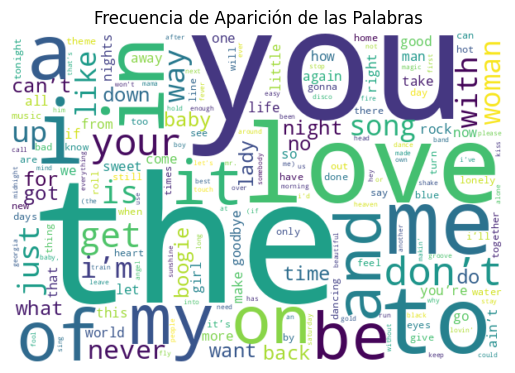

In [320]:
# Concatenación de los registros auxiliares a nuestros datos de interés.
tracks = pd.concat([modified_dataset["Track"], registros_auxiliares["Track"]], ignore_index=True)

# Medición de la frecuencia de aparición de las palabras.
palabras = tracks.str.lower().str.split().explode().value_counts().to_dict()

# Elimino los paréntesis de aquellas entradas del diccionario que los contengan.
palabras_sin_parentesis = {re.sub(r'[\(\)]', '', key): value for key, value in palabras.items()}

# Creación de una nube de palabras.
wordcloud = wd(
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(palabras)

# Presentación del gráfico creado.
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de las Palabras")
plt.show()


Se observa una cantidad signficativa de preposiciones, pronombres, artículos y otros tipos de palabras sobre las que no se tienen interés en analizar. Por consiguiente, se descartan:

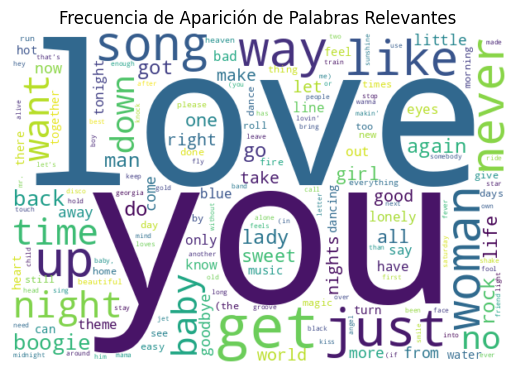

In [321]:
# Lista de palabras a eliminar.
palabras_a_eliminar = ["i’ll", "he’s", "she’s", "you’re", "we’re", "the", "of", "to", "don’t", "won’t", "ain’t", "when", "with", "in", "on", "and", "for",
                "this", "that", "i’m", "a", "me", "my", "i", "is", "be", "it", "what", "your", "how", "&", "gonna", "I’ve", "you’ve", "we’ve", "it’s",
                "’s", "no'", "can’t", "’ve", "’d", "’ll", "an", "at", "will", "we", "if", "why", "us", "could", "i’d", "he’d", "she’d", "we’d", "are",
                "so", "not", "that's"]

# Filtrado de palabras de interés.
for palabra in palabras_a_eliminar:
    palabras.pop(palabra.lower(), None) # "None" sirve para no haya un error en caso de que no exista la palabra.

# Creación de la nube de palabras.
wordcloud = wd(
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(palabras)

# Presentación del gráfico.
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de Palabras Relevantes")
plt.show()


Es posible observar una repetición frecuente de palabras de índole romántico, tales como *woman*, *girl*, *lady*, *night*, *baby*, *tonight*, *sweet*, *hot*, etc.

Como otro punto de análisis, surgió la necesidad de corroborar si el título de todas las pistas se hallaba en inglés. Para ello, se utilizó **lingua**, una librería para reconocimiento de lenguaje:

In [322]:
# Definición de los idiomas.
idiomas = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]

# Construcción del detector.
detector = LanguageDetectorBuilder.from_languages(*idiomas).build()

modified_dataset["Track_Language"] = [
    detector.detect_language_of(x).name for x in modified_dataset["Track"]
]

modified_dataset

Track              Artist  Duration  \
0                                           Abc       The Jackson 5       162   
1                                     Let It Be         The Beatles       243   
2                               I Want You Back       The Jackson 5       176   
3                                       Cecilia   Simon & Garfunkel       174   
4                             Spirit In The Sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    He’s The Greatest Dancer       Sister Sledge       375   
976                          Don’t Cry Out Loud  Melissa Manchester       135   
977  When You’re In Love With A Beautiful Woman            Dr. Hook       174   
978              I’ll Never Love This Way Again      Dionne Warwick       178   
979                          Dim All The Nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  Track_Length Track_Language  
0    1970             1        ENGLISH  
1    1970             3         GERMAN  
2    1970             4        ENGLISH  
3    1970             1        SPANISH  
4    1970             4        ENGLISH  
..    ...           ...            ...  
975  1979             4        ENGLISH  
976  1979             4        ENGLISH  
977  1979             8        ENGLISH  
978  1979             6        ENGLISH  
979  1979             4        ENGLISH  

[944 rows x 19 columns]

El detector es potente, pero no es bueno detectando el idioma de textos de corta longitud, especialmente si no están en inglés. Por lo tanto, se filtraron aquellas filas detectadas con un idioma distinto al inglés, se almacenaron en un archivo CSV y se analizaron manualmente:

In [323]:
modified_dataset[modified_dataset["Track_Language"] != "ENGLISH"].to_csv("Datasets/Generados/NotEnglishTracks.csv")

Como resultado del análisis, se halló una pista cuyo título está en español. La pista es "Eres Tú" de Mocedades, la cual fue muy famosa en el público anglosajón:

In [324]:
modified_dataset[modified_dataset["Track"] == "Eres Tú"]

Track     Artist  Duration  Time_Signature  Danceability  Energy  Key  \
395  Eres Tú  Mocedades       242               4         0.639   0.399    5   

     Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
395   -11.815     1       0.0248         0.484           0.00056     0.133   

     Valence   Tempo  Popularity  Year  Track_Length Track_Language  
395    0.306  79.113          72  1974             2        SPANISH

Conclusiones:
- La mayoría de los tracks tienen cinco o menos palabras.
- Hay una presencia elevada de palabras de índole romántico en los títulos de los tracks.
- El nombre de todas las pistas está en inglés, exceptuando una: "Eres tú" de Mocedades, la cual fue muy popular en el público anglosajón.


### *Artist*.

Como consecuencia del análisis de la variable *Track*, puesto a que el título de todas las canciones, exceptuando una, están en inglés y que hay una relativamente elevada frecuencia en el título de las pistas de las palabras *aint't* y *gonna*, surgió la necesidad de comprobar si todas las canciones corresponden a artistas estadounidenses.

Para poder validar esto, utilizamos la API MusicBrainzngs para obtener la nacionalidad de cada artista. Debido a que el proceso realizado por la API toma demasiado tiempo, junto al trabajo, se adjunta un archivo en Python con el algortimo. Este puede ser hallado en la carpeta ***Functions***, bajo el nombre de ***MusicBrainzngs.py***.

In [325]:
# Guardado de los artistas en un archivo para su uso en el algoritmo que utiliza la API.
pd.concat([modified_dataset["Artist"], registros_auxiliares["Artist"]], ignore_index=True).to_csv("Datasets/Generados/ArtistDataset.csv")

Las búsqueda ofrecida por la API no es exacta y a veces no se halla el artista con el nombre tal y como aparece en el dataset. Esto último producto de que, por ejemplo, a veces el artista son en realidad varios artistas, como en el ejemplo a continuación:

In [326]:
# Ejemplo de colaboración entre artistas.
modified_dataset[modified_dataset["Artist"].str.contains("/")]

Track                          Artist  Duration  Time_Signature  \
95  Imagine  John Lennon / Plastic Ono Band       187               4   

    Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
95         0.547   0.257    0   -12.358     1       0.0252         0.907   

    Instrumentalness  Liveness  Valence   Tempo  Popularity  Year  \
95             0.183    0.0935    0.169  75.752          75  1971   

    Track_Length Track_Language  
95             1         FRENCH

 Por lo tanto, se tuvo que hacer el chequeo manual de cada uno de los artistas no coincidentes con el nombre proporcionado por la API y separarse las colaboraciones en dos artistas distintos. Adicionalmente, tuvieron que identificarse y eliminarse artistas repetidos:

In [327]:
artist_dataset = pd.read_csv("Datasets/Generados/ArtistsNationalities.csv")

# Generación de archivo con los artistas cuyo nombre difiere.
artist_dataset[artist_dataset["Artista"] != artist_dataset["Nombre"]].to_csv("Datasets/Generados/ArtistDiffers.csv", index=False)

El resultado es el siguiente *dataset*, el cual contiene, para cada artista, su nacionalidad:

In [328]:
nationality_artists = pd.read_csv("./Datasets/Generados/CheckedArtists.csv")

nationality_artists

Artist Nationality
0           The Jackson 5          US
1             The Beatles          GB
2       Simon & Garfunkel          US
3        Norman Greenbaum          US
4       Edison Lighthouse          GB
..                    ...         ...
530           Frank Mills          CA
531        Bonnie Pointer          US
532  McFadden & Whitehead          US
533      Rickie Lee Jones          US
534                    GQ          US

[535 rows x 2 columns]

Durante el proceso, además, se identificaron distintos nombres con los que un mismo fue cargado. Estos fueron detallados en el siguiente CSV:

In [329]:
alternative_artist_names = pd.read_csv("./Datasets/Generados/AlternativeArtistNames.csv")

alternative_artist_names

Artista  \
0                               The Jackson 5   
1                               The Jackson 5   
2                              The Carpenters   
3                                        Dawn   
4                      The Brotherhood of Man   
5                               The Four Tops   
6                             Alive N Kickin’   
7                                     Tee Set   
8                                        Dawn   
9                                 Grass Roots   
10                  Paul Revere & the Raiders   
11                           Delaney & Bonnie   
12                                   Dr. Hook   
13  Commander Cody and His Lost Planet Airmen   
14                        The Main Ingredient   
15                              Art Garfunkel   
16                      Bobby ‘Boris’ Pickett   
17                        Loggins and Messina   
18                           Seals and Crofts   
19                       Charlie Daniels Band   
20                        The DeFranco Family   
21                                    Deodato   
22                            The First Class   
23                           Plastic Ono Band   
24                     Donny and Marie Osmond   
25                                 Grand Funk   
26                  Ozark Mountain Daredevils   
27                               Four Seasons   
28                                     Bazuka   
29                               Hall & Oates   
30                           Blue Oyster Cult   
31                     Andrea True Connection   
32                               C. W. McCall   
33             Harold Melvin & the Blue Notes   
34      Wing and a Prayer Fife and Drum Corps   
35                          Pratt and McClain   
36                              Walter Murphy   
37         Bob Seger & The Silver Bullet Band   
38                          Lord David Dundas   
39                     KC & the Sunshine Band   

                               Alternative_Name  
0                                  The Jacksons  
1                                     Jackson 5  
2                                    Carpenters  
3                           Tony Orlando & Dawn  
4                            Brotherhood of Man  
5                                     Four Tops  
6                              Alive 'n Kickin'  
7                                       Tee-Set  
8                         Tony Orlando and Dawn  
9                               The Grass Roots  
10                  Paul Revere and the Raiders  
11                   Delaney & Bonnie & Friends  
12                 Dr. Hook & The Medicine Show  
13      Commander Cody & His Lost Planet Airmen  
14                              Main Ingredient  
15                                    Garfunkel  
16                        Bobby “Boris” Pickett  
17                            Loggins & Messina  
18                               Seals & Crofts  
19                     The Charlie Daniels Band  
20  The DeFranco Family featuring Tony DeFranco  
21                                Eumir Deodato  
22                                  First Class  
23                         The Plastic Ono Band  
24                         Donny & Marie Osmond  
25                          Grand Funk Railroad  
26                The Ozark Mountain Daredevils  
27                             The Four Seasons  
28                        Tony Camillo’s Bazuka  
29                      Daryl Hall & John Oates  
30                             Blue Öyster Cult  
31                   The Andrea True Connection  
32                                  C.W. McCall  
33                Harold Melvin & The Blue Note  
34            Wing & A Prayer Fife & Drum Corps  
35                              Pratt & McClain  
36           Walter Murphy & The Big Apple Band  
37           Bob Seger & the Silver Bullet Band  
38                                 David Dundas  
39                     KC an

Finalmente, con el trabajo realizado y habiéndose verificado la validez de los datos, fue posible validar la hipótesis de que la mayoría de los artistas del *dataset* son estadounidenses:

In [330]:

# Creación del histograma.
fig = px.histogram(nationality_artists, x="Nationality", width=800, height=400,)

# Ajuste de los títulos de los ejes.
fig.update_layout(
    title="Distribución de Artistas por Nacionalidad",
    yaxis_title_text="Cantidad de Artistas",
    xaxis_title_text="Nacionalidad",
    xaxis={'categoryorder': 'total descending'}  # Ordenamiento de mayor a menor cantidad de artistas.
)

fig.show()

### *Duration*.

Para analizar la variable, se realizó un *scatter plot* de esta para identificar extravagancias:

In [331]:
fig = px.scatter(clean_dataset, y="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

A partir del anterior gráfico, se detectó una pista con una duración sobresaliente de 1561 segundos, lo cual equivaldría a aproximadamente 26 minutos. La pista en cuestión es la siguiente:

In [332]:
duracion_maxima = clean_dataset["Duration"].max()
pista_mas_larga = clean_dataset[clean_dataset["Duration"] == duracion_maxima]

pista_mas_larga

Track         Artist  Duration  Time_Signature  Danceability  \
449  Tubular Bells  Mike Oldfield      1561               4         0.374   

     Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
449   0.219    4   -19.104     0       0.0343         0.564              0.56   

     Liveness  Valence    Tempo  Popularity  Year  
449     0.114   0.0579  103.535          47  1974

Al observar el *dataset* original, es posible observar que la pista fue cargada con una duración atípica. Al realizar la búsqueda, resulta que *Tubular Bells* es, en realidad, un disco con una duración de 48 minutos. Uno de sus lados, el primero, denominado *Tubular Bells, Part One*, es el que tiene una duración de 26 minutos. En él, se hallan un sinfín de melodías.

Debido a estas peculiaridades frente al resto de registros en el *dataset*, se tomó la decisión de eliminar la entrada. El *track* contiene dentro varias canciones y no es posible validar si los demás datos corresponden a una de las melodías, a todas o ni siquiera si son correctos.

Debido a que se trata de un álbum no es posible verificar que sea la única variable cargada incorrectamente para el registro y al ser relativamente insigficante frente a la cantidad de registros restantes, se optó por eliminarla:

In [333]:
clean_dataset = clean_dataset.drop(pista_mas_larga.index)

clean_dataset.sort_values("Duration", ascending=False)

Track                 Artist  Duration  \
645           Love To Love You Baby           Donna Summer      1008   
920                        Promises           Eric Clapton       646   
348                     Pillow Talk                 Sylvia       645   
846                   Feels So Good         Chuck Mangione       582   
381  Also Sprach Zarathustra (2001)                Deodato       539   
..                              ...                    ...       ...   
865                What’s Your Name         Lynyrd Skynyrd        87   
149             Bring The Boys Home            Freda Payne        87   
227                    Day Dreaming        Aretha Franklin        80   
571                        Dynomite  Tony Camillo’s Bazuka        77   
643                      Happy Days      Pratt and McClain        76   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
645               4         0.622  0.4250   10   -16.256     1       0.0520   
920               4         0.362  0.4210   10   -11.699     1       0.0372   
348               4         0.919  0.3620    8    -8.331     1       0.3680   
846               4         0.576  0.6030    5    -9.603     1       0.0329   
381               4         0.425  0.6690    5    -9.481     1       0.0316   
..              ...           ...     ...  ...       ...   ...          ...   
865               4         0.889  0.4500   11    -6.852     0       0.0357   
149               4         0.330  0.2830    0   -15.971     1       0.0610   
227               4         0.213  0.0751    7   -27.103     1       0.0433   
571               4         0.685  0.4030    0   -10.887     1       0.3050   
643               4         0.212  0.5540    0    -8.352     1       0.0473   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
645       0.29200          0.000057    0.0498   0.4170   96.168          50   
920       0.28100          0.000062    0.0943   0.2330  114.669          65   
348       0.57600          0.000000    0.1340   0.4160  104.987          49   
846       0.45500          0.053700    0.0406   0.5240  103.658          51   
381       0.08440          0.916000    0.9000   0.3240  114.751          15   
..            ...               ...       ...      ...      ...         ...   
865       0.33400          0.000000    0.3490   0.7830  112.023          36   
149       0.57500          0.094700    0.2350   0.2870  157.963          49   
227       0.97100          0.441000    0.1130   0.0346   85.295          58   
571       0.00483          0.000000    0.1740   0.5460   93.826          23   
643       0.00325          0.859000    0.3240   0.6250  137.787          51   

     Year  
645  1976  
920  1979  
348  1973  
846  1978  
381  1973  
..    ...  
865  1978  
149  1971  
227  1972  
571  1975  
643  1976  

[943 rows x 17 columns]

De igual forma, puede observarse en el *scatter plot* otra pista con una duración sobresaliente de 1008 segundos (17 minutos aproximadamente). No obstante, la pista fue descartada como posible *outlier* puesto a que se comprobó de que se trata de un dato real y, por lo tanto, se optó por no eliminarla del *dataset*.

Como segundo punto del análisis, usando un *boxplot*, se analizó la duración en la que suelen rondar la mayoría de las canciones:

In [334]:
fig = px.box(clean_dataset, y="Duration", title='Distribución de la variable "Duration"', width=800, height=400)

fig.show()

#### Conclusiones.

- La mayoría de las canciones del *dataset* tiene una duración de entre 184.5 segundos (aproximadamente tres minutos) y 251 segundos (un poco más de cuatro minutos).
- Hay canciones que quedan fuera de este rango; no obstante, no son *outliers*.

### *Time_Signature*

Para iniciar a analizar la variable, se realizó un histograma de esta:

In [335]:
# Creación del histograma.
fig = px.histogram(clean_dataset, x="Time_Signature", width=800, height=400)

# Agregado de título y personalización del título de los ejes.
fig.update_layout(
    title="Distribución de los Compases en el Dataset",
    xaxis_title="Compás (Time Signature)",
    yaxis_title="Frecuencia Absoluta",
    bargap=0.2  # Ajuste del espacio entre barras.
)

fig.show()

En el histograma anterior, es fácil notar que la mayoría de las canciones tiene un compás de 4. A su vez, es posible observar una muy pequeña cantidad de registros con compás 1 (tres registros) y compás 5 (dos registros). Al investigar, se halló que son valores de compás extremadamente raros, pero que existen canciones que los utilizan. Debido a su peculiaridad, se tomó la decisión de analizar dichos registros a fondo:

In [336]:
ts1and5_songs = clean_dataset[(clean_dataset["Time_Signature"] == 1) | (clean_dataset["Time_Signature"] == 5)]

ts1and5_songs

Track                    Artist  Duration  \
466                   Love’s Theme  Love Unlimited Orchestra       202   
483                      I’m Sorry               John Denver       167   
506  Lucy In The Sky With Diamonds                Elton John       208   
563         Love Won’t Let Me Wait              Major Harris       227   
871                  My Angel Baby                 Toby Beau       207   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
466               1         0.262   0.136    9   -19.819     0       0.0284   
483               5         0.445   0.455    7    -6.405     1       0.0575   
506               1         0.311   0.325    2    -9.042     1       0.0283   
563               1         0.597   0.291   11   -13.837     0       0.0352   
871               5         0.228   0.116    9   -23.560     0       0.0435   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
466        0.9500          0.909000     0.169   0.1130   75.454          37   
483        0.7310          0.000001     0.124   0.1510  109.885          81   
506        0.0469          0.000000     0.139   0.6680   65.090          65   
563        0.9170          0.000030     0.122   0.2260  115.666          37   
871        0.9650          0.944000     0.152   0.0385   82.294          26   

     Year  
466  1974  
483  1975  
506  1975  
563  1975  
871  1978

Se buscó en Internet los detalles de cada una de las canciones anteriores y se halló que estos no coinciden para ninguna de las canciones mostradas anteriormente. Como consecuencia de que el compás no es el único dato erróneo que tienen los registros, se optó por eliminar cada uno de ellos:

In [337]:
clean_dataset = clean_dataset.drop(ts1and5_songs.index)

clean_dataset

Track              Artist  Duration  \
0                                           Abc       The Jackson 5       162   
1                                     Let It Be         The Beatles       243   
2                               I Want You Back       The Jackson 5       176   
3                                       Cecilia   Simon & Garfunkel       174   
4                             Spirit In The Sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    He’s The Greatest Dancer       Sister Sledge       375   
976                          Don’t Cry Out Loud  Melissa Manchester       135   
977  When You’re In Love With A Beautiful Woman            Dr. Hook       174   
978              I’ll Never Love This Way Again      Dionne Warwick       178   
979                          Dim All The Nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[938 rows x 17 columns]

Conclusiones.
- La mayoría de las canciones tiene cuatro pulsaciones por compás, lo cual es lo más común hoy en día.
- Una pista con una pulsación por compás o cinco pulsaciones por compás es extremadamente rara.

### *Danceability*.

Para estudiar la variable, se decidió como primer paso realizar un *boxplot* de esta:

In [338]:
fig = px.box(clean_dataset, x="Danceability", title='Boxplot de la Variable "Danceability"', width=800, height=400, notched=True)

fig.show()

A partir del *boxplot*, se detectaron siete posibles *outliers*. Para determinar si efectivamente lo son o no, se analizó cada uno de ellos:

In [339]:
clean_dataset[clean_dataset["Danceability"] < 0.185] # Valor de la "lower fence".

Track                           Artist  Duration  \
137           Ain’t No Sunshine                     Bill Withers       192   
436                  The Streak                      Ray Stevens       244   
947  You Don’t Bring Me Flowers  Neil Diamond & Barbra Streisand       195   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
137               4        0.0942   0.995    2   -27.090     0       0.0514   
436               4        0.1640   0.949   11    -2.588     0       0.0581   
947               4        0.1600   0.123    0   -18.111     1       0.0400   

     Acousticness  Instrumentalness  Liveness  Valence   Tempo  Popularity  \
137       0.31500          0.970000     0.957  0.00001  83.334          53   
436       0.00028          0.013400     0.374  0.25700  99.754          51   
947       0.87800          0.000022     0.157  0.23900  67.006          55   

     Year  
137  1971  
436  1974  
947  1979

Posterior a su escucha y análisis, se concluyó que no se tratan de *outliers*, sino de canciones realmente tristes y poco bailables. Por consiguiente, se conservaron en el *dataset*.

### Energy

Se realizaró un *boxplot* para estudiar la variable:

In [340]:
# Creación del boxplot.
fig = px.box(clean_dataset, x="Energy", title='Boxplot de la variable "Energy"', width=800, height=400, notched=True)

fig.show()


Analizando el gráfico, no es posible observar valores atípicos. Por otro lado, se puede notar una distribución bastante normal, con un leve sesgo a izquierda, el cual es posible verificar mediante el coeficiente de asimetría:

In [341]:
modified_dataset["Energy"].skew()

np.float64(-0.13698233263639148)

### Key


Acorde a la teoría musical, la equivalencia entre las keys y el valor de la variable utilizado en el *dataset* es:


In [342]:
equivalencia_notas = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

Siendo las notas más frecuentes halladas en el dataset, ordenadas de mayor frecuencia a menor:

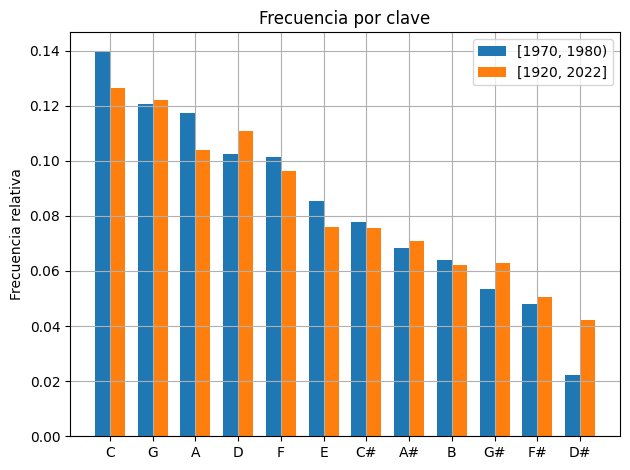

In [343]:
# Obtenemos las notas más repetidas en nuestro dataset.

key_dataset = clean_dataset.copy()

notas_original = key_dataset["Key"].value_counts()

notas_original = notas_original.astype("float64")

notas_original = notas_original.rename(index=equivalencia_notas)

total_original = key_dataset.shape[0]

# Obtenemos las notas más repetidas en un dataset más amplio.

key_dataset_ampliado = spotify_dataset.copy()

notas_ampliado = key_dataset_ampliado["key"].value_counts()

notas_ampliado = notas_ampliado.astype("float64")

notas_ampliado = notas_ampliado.rename(index=equivalencia_notas)

total_ampliado = key_dataset_ampliado.shape[0]

# Combinamos las notas más repetidas en un dataset para compararlas.
combined = pd.DataFrame({'Original': notas_original, 'Ampliado': notas_ampliado}).fillna(0)

# Normalización de las frecuencias relativas
combined['Original'] = combined['Original'] / total_original
combined['Ampliado'] = combined['Ampliado'] / total_ampliado

# Ordenamos el ddataframe por la columna 'Origianl'.
combined = combined.sort_values(by='Original', ascending=False)

x = np.arange(len(combined))  # Posiciones de las etiquetas

width = 0.35  # Ancho de las barras

# Creamos las barras.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, combined['Original'], width, label='[1970, 1980)')
rects2 = ax.bar(x + width/2, combined['Ampliado'], width, label='[1920, 2022]')

# Añadimos etiquetas y un título.
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Frecuencia por clave')
ax.set_xticks(x, combined.index)
ax.legend()

# Mejoramos el diseño.
fig.tight_layout()
plt.grid()

# Mostramos el gráfico.
plt.show()

¿Cómo hacer énfasis en la diferencia?

#### Conclusiones.

- La frecuencia de aparición de las notas coincide con las estadísticas que podemos hallar en algunas páginas: https://www.hooktheory.com/cheat-sheet/key-popularity.

### *Loudness*.

Se realizó un *boxplot* de la variable para estudiarla:

In [344]:
fig = px.box(modified_dataset, x="Loudness", width=800, height=400)

fig.show()

Se detectaron diez posibles *outliers*:

In [345]:
modified_dataset[modified_dataset["Loudness"] < -20.149]

Track              Artist  Duration  \
137                    Ain’t No Sunshine        Bill Withers       192   
226  The First Time Ever I Saw Your Face       Roberta Flack       260   
227                         Day Dreaming     Aretha Franklin        80   
245                         Garden Party        Ricky Nelson       229   
316                                Clair  Gilbert O’Sullivan       268   
666                   That’ll Be The Day      Linda Ronstadt       158   
731                           I’m In You      Peter Frampton        96   
820                        Jack And Jill              Raydio        99   
834                   Three Times A Lady          Commodores       217   
871                        My Angel Baby           Toby Beau       207   

     Time_Signature  Danceability   Energy  Key  Loudness  Mode  Speechiness  \
137               4        0.0942  0.99500    2   -27.090     0       0.0514   
226               4        0.3110  0.02640    0   -21.644     1       0.0370   
227               4        0.2130  0.07510    7   -27.103     1       0.0433   
245               4        0.7740  0.24700    2   -21.657     1       0.0779   
316               4        0.3350  0.00532    1   -31.646     1       0.0376   
666               4        0.5600  0.14000    1   -20.439     1       0.0325   
731               4        0.4850  0.00880    5   -30.000     1       0.0507   
820               4        0.5190  0.02650    7   -26.128     1       0.0554   
834               3        0.3900  0.08030    8   -20.518     1       0.0306   
871               5        0.2280  0.11600    9   -23.560     0       0.0435   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
137         0.315          0.970000    0.9570  0.00001   83.334          53   
226         0.731          0.002050    0.1560  0.13900  120.653          59   
227         0.971          0.441000    0.1130  0.03460   85.295          58   
245         0.786          0.018600    0.1160  0.80300  143.955          51   
316         0.994          0.912000    0.0621  0.03970   65.832          65   
666         0.862          0.968000    0.0927  0.05890   74.483          32   
731         0.996          0.940000    0.1140  0.18900   85.778          58   
820         0.992          0.940000    0.0986  0.52300   98.470          63   
834         0.874          0.000639    0.1270  0.18400  150.503          55   
871         0.965          0.944000    0.1520  0.03850   82.294          26   

     Year  Track_Length Track_Language  
137  1971             3        ENGLISH  
226  1972             8        ENGLISH  
227  1972             2        ENGLISH  
245  1972             2        ENGLISH  
316  1973             1         FRENCH  
666  1976             4        ENGLISH  
731  1977             3        ENGLISH  
820  1978             3        ENGLISH  
834  1978             4        ENGLISH  
871  1978             3        ENGLISH

Determinar si se tratan de *outliers* no es posible, puesto que para ello sería necesaria la pista original y de la que provengan los datos del *dataset*. No obstante, los valores especificados son valores lógicos y frecuentes en canciones del pasado. Por lo mismo, no se consideraron *outliers* y se mantuvieron en el análisis.

Rangos altos de posibles decibeles eran comunes en décadas anteriores. Hoy en día, para que no sea necesario cambiar constamente el volumen del dispositivo al pasar de una pista a otra, los valores se normalizan.

### *Mode*.

Se estudió la frecuencia de la variable, realizando para ello un gráfico de torta:

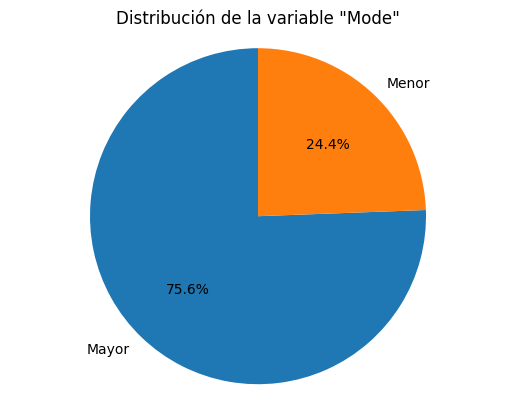

In [346]:
# Cálculo de valores.
valores_mode = clean_dataset["Mode"].value_counts()

# Creación del gráfico de torta.
plt.pie(valores_mode, labels=["Mayor", "Menor"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.title('Distribución de la variable "Mode"')
plt.show()

Conclusión:
- Aproximadamente, un 75 % de las pistas tienen tonalidades expresadas en modo mayor. Esto se asocia con pistas más alegres y optimistas.

### *Speechiness*.

Se realizó un histograma de la variable para estudiarla:

In [347]:
# Creación del histograma.
fig = px.histogram(clean_dataset, x="Speechiness", title='Histograma de la Variable "Speechiness"',
                        width=800, height=400, nbins=150)

fig.update_layout(
    xaxis_title_text="Speechiness",
    yaxis_title_text="Cantidad de Registros",
    bargap=0.2
)

fig.show()


Se observa un gran sesgo positivo (a derecha), con la mayoría de los valores de la variable menores a 0.1, el cual fue verificado mediante el coeficiente de asimetría:

In [348]:
# Calcula el coeficiente de asimetría para cada columna
print(f"Coeficiente de asimetría para la variable Speechiness: {modified_dataset["Speechiness"].skew()}")

Coeficiente de asimetría para la variable Speechiness: 4.383289876045615


Se tomó la decisión de analizar aquellos registros que más sesgaban la distribución y comprobar si se tratan de *outliers*:

In [349]:
clean_dataset[clean_dataset["Speechiness"] > 0.4]

Track                 Artist  Duration  \
178                 Mama’s Pearl          The Jackson 5       407   
251               Freddie’s Dead        Curtis Mayfield       148   
337                 Monster Mash  Bobby ‘Boris’ Pickett       192   
347      Boogie Woogie Bugle Boy           Bette Midler       161   
394                Jungle Boogie        Kool & the Gang       174   
524                     Old Days                Chicago       195   
573  That’s The Way Of The World     Earth, Wind & Fire       523   
899                   Lotta Love       Nicolette Larson       333   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
178               4         0.365   0.887    9    -9.936     1        0.452   
251               4         0.821   0.574    1    -4.872     1        0.405   
337               4         0.541   0.504   11   -14.191     0        0.457   
347               4         0.640   0.479    7   -11.550     1        0.467   
394               4         0.538   0.520    7   -11.063     0        0.737   
524               4         0.599   0.710    1    -7.390     1        0.576   
573               4         0.265   0.969    1    -5.062     1        0.448   
899               4         0.412   0.902    9   -11.600     1        0.405   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
178        0.0378          0.003320    0.4320    0.426  155.164          23   
251        0.0536          0.000006    0.0799    0.441  170.941          47   
337        0.3750          0.000000    0.4210    0.707   68.482          54   
347        0.8810          0.000171    0.0973    0.790  166.868          49   
394        0.3080          0.000000    0.2140    0.551  180.274          73   
524        0.3510          0.000000    0.1130    0.572   82.243          59   
573        0.0160          0.000223    0.7170    0.302   90.017          15   
899        0.0484          0.131000    0.4050    0.422   89.740          74   

     Year  
178  1971  
251  1972  
337  1973  
347  1973  
394  1974  
524  1975  
573  1975  
899  1979

Al escuchar las pistas y compararlas con aquellas con valores de *Speechiness* más bajos, se concluyó que no se tratan de *outliers*, sino que, efectivamente, determinan canciones con cualidades más parecidas al habla que al canto. El ejemplo más claro es la ccanción con el valor de *Speechiness* más alto: *Jungle Boogie* de Koll & the Gang.

### *Acousticness*.

La variable es una **medida de probabilidad** de que la pista sea acústica. Por lo mismo, una canción con alto valores de *Acousticness* no necesariamente nos habla de una canción acústica. Esto, por supuesto, dificulta el análisis de la variable, puesto a que se desconoce cuáles son las características consideradas para dotar a una pista de mayores o menores probabilidades.

In [350]:
fig = px.histogram(modified_dataset, x="Acousticness", title="Distribución de la variable 'Acousticness'", width=800, height=400)

fig.update_layout(
    xaxis_title_text="Probabilidad de que la Pista sea Acústica",
    yaxis_title_text="Cantidad de Registros",
    bargap=0.2
)

fig.show()

Al observarse el histogrma, puede notarse un sesgo a derecha, el cual puede ser comprobado mediante el coeficiente de asimetría:

In [351]:
# Calcula el coeficiente de asimetría para cada columna
print(f"Coeficiente de asimetría para la variable Acousticness: {modified_dataset["Acousticness"].skew()}")

Coeficiente de asimetría para la variable Acousticness: 0.6028150337900363


Debido a tratarse de una medida de probabilidad, no es posible determinar con seguridad cuántas de las canciones son acústicas. Sin embargo, lo que sí es posible concluir es que el conjunto de canciones con bajas probabilidades de ser acústicas es mayor al de las canciones con altas probabilidades de serlo. Por consiguiente, es más probable que, de seleccionarse una pista aleatoria del *dataset*, esta no sea acústica.

### *Instrumentalness*.

Se realizó un *boxplot* de la variable para su estudio:

In [352]:
fig = px.box(modified_dataset, x="Instrumentalness", width=800, height=400)

fig.show()

Un 75 % de los datos presenta valores de *instrumentalness* menores o iguales a 0.002710. Se decidió, por lo tanto, analizar aquellas canciones con valores que más se escapan del *boxplot*:

In [353]:
modified_dataset[modified_dataset["Instrumentalness"] > 0.80]

Track  \
137                           Ain’t No Sunshine   
316                                       Clair   
342                  Why Can’t We Live Together   
345                                 Hocus Pocus   
350                              Dueling Banjos   
379      Ain’t No Woman (LIKE The One I’ve Got)   
381              Also Sprach Zarathustra (2001)   
466                                Love’s Theme   
569                    The Rockford Files Theme   
643                                  Happy Days   
666                          That’ll Be The Day   
675  Nadia’s Theme (THE Young And The Restless)   
731                                  I’m In You   
820                               Jack And Jill   
871                               My Angel Baby   
880                This Time I’m In It For Love   
960                            Music Box Dancer   

                                   Artist  Duration  Time_Signature  \
137                          Bill Withers       192               4   
316                    Gilbert O’Sullivan       268               4   
342                          Timmy Thomas       328               4   
345                                 Focus       402               4   
350        Eric Weissberg & Steve Mandell       194               4   
379                         The Four Tops       157               4   
381                               Deodato       539               4   
466              Love Unlimited Orchestra       202               1   
569                             Mike Post       186               4   
643                     Pratt and McClain        76               4   
666                        Linda Ronstadt       158               4   
675  Barry DeVorzon and Perry Botkin, Jr.       189               4   
731                        Peter Frampton        96               4   
820                                Raydio        99               4   
871                             Toby Beau       207               5   
880                                Player       116               4   
960                           Frank Mills       192               4   

     Danceability   Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
137        0.0942  0.99500    2   -27.090     0       0.0514       0.31500   
316        0.3350  0.00532    1   -31.646     1       0.0376       0.99400   
342        0.8370  0.32200   10   -10.161     1       0.0356       0.81000   
345        0.2670  0.72200    2    -7.344     1       0.1020       0.00596   
350        0.4170  0.48400    9    -8.781     1       0.0791       0.40900   
379        0.5190  0.71000    9   -10.908     0       0.0362       0.66500   
381        0.4250  0.66900    5    -9.481     1       0.0316       0.08440   
466        0.2620  0.13600    9   -19.819     0       0.0284       0.95000   
569        0.4890  0.56200    2   -11.494     1       0.0301       0.06710   
643        0.2120  0.55400    0    -8.352     1       0.0473       0.00325   
666        0.5600  0.14000    1   -20.439     1       0.0325       0.86200   
675        0.2790  0.24300    7   -12.560     0       0.0298       0.91300   
731        0.4850  0.00880    5   -30.000     1       0.0507       0.99600   
820        0.5190  0.02650    7   -26.128     1       0.0554       0.99200   
871        0.2280  0.11600    9   -23.560     0       0.0435       0.96500   
880        0.9650  0.42700    8   -19.720     1       0.1050       0.88300   
960        0.4660  0.47100    1   -13.762     1       0.0390       0.57300   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  \
137             0.970    0.9570  0.00001   83.334          53  1971   
316             0.912    0.0621  0.03970   65.832          65  1973   
342             0.875    0.0966  0.96200  104.499          53  1973   
345             0.893    0.3500  0.34700  184.093          50  1973   
350             0.959    0.0663  0.50100  149.790          48  1973   
379          

Al analizar las canciones con valores más alto de *Instrumentalness*, encontramos que muchas de ellas tienen una alta presencia de voces. Por consiguiente, contrario al primer pensamiento, surgió la idea de que la voz pueda ser interpretada como un instrumento y, que en realidad, la variable indique la confianza con la que una canción no contiene vocales. Para verificar esto, se analizaron las canciones con menor *Instrumentalness*:

In [354]:
modified_dataset[modified_dataset["Instrumentalness"] < 0.0001]

Track                              Artist  \
0                                    Abc                       The Jackson 5   
1                              Let It Be                         The Beatles   
3                                Cecilia                   Simon & Garfunkel   
5    Love Grows (WHERE My Rosemary Goes)                   Edison Lighthouse   
9                      In The Summertime                         Mungo Jerry   
..                                   ...                                 ...   
970                          In The Navy                      Village People   
971              Mama Can’t Buy You Love                          Elton John   
973                    We’ve Got Tonight  Bob Seger & The Silver Bullet Band   
976                   Don’t Cry Out Loud                  Melissa Manchester   
979                   Dim All The Nights                        Donna Summer   

     Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
0         162               4         0.682   0.926    3    -2.515     0   
1         243               4         0.443   0.403    0    -8.339     1   
3         174               4         0.755   0.876    0    -8.867     1   
5         174               4         0.568   0.824    9    -4.613     1   
9         211               4         0.754   0.449    4   -14.013     1   
..        ...             ...           ...     ...  ...       ...   ...   
970       225               4         0.759   0.889    7   -10.592     0   
971       244               4         0.529   0.432    5   -14.245     1   
973       215               4         0.379   0.387    8    -9.283     1   
976       135               4         0.298   0.252    0    -8.950     1   
979       248               4         0.758   0.540    7   -10.911     1   

     Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0         0.0607        0.0404          0.000000    0.1900    0.860  105.969   
1         0.0322        0.6310          0.000000    0.1110    0.410  143.462   
3         0.0362        0.3570          0.000005    0.2200    0.954  102.762   
5         0.0299        0.4030          0.000000    0.0855    0.753  108.625   
9         0.0615        0.7240          0.000000    0.1620    0.973   82.751   
..           ...           ...               ...       ...      ...      ...   
970       0.0502        0.1250          0.000000    0.0410    0.886  126.201   
971       0.0333        0.5240          0.000000    0.1150    0.555   94.382   
973       0.0278        0.7570          0.000000    0.1030    0.222   61.530   
976       0.0339        0.9010          0.000009    0.1270    0.193   90.955   
979       0.0385        0.0551          0.000000    0.0343    0.661  121.581   

     Popularity  Year  Track_Length Track_Language  
0            81  1970             1        ENGLISH  
1            78  1970             3         GERMAN  
3            76  1970             1        SPANISH  
5            73  1970             6        ENGLISH  
9            71  1970             3        ENGLISH  
..          ...   ...           ...            ...  
970          38  1979             3        ENGLISH  
971          36  1979             5        ENGLISH  
973          26  1979             3        ENGLISH  
976           9  1979             4        ENGLISH  
979           0  1979             4        ENGLISH  

[510 rows x 19 columns]

Sin embargo, al escuchar varias pistas con valores de *Instrumentalness* muy bajos y compararlas con pistas con valores muy altos, no se halló ninguna diferencia en cuanto a los instrumentos, la presencia de voces ni ninguna otra característica. Se concluyó entonces que la variable no determina lo que dice determinar ni representa lo que su nombre indica.

Debido a que se desconoce qué es lo que la variable describe y que, por lo tanto, no es posible comprobar su validez ni sacar conclusiones acerca de ella, fue descartada del análisis:

In [355]:
modified_dataset = modified_dataset.drop(columns=["Instrumentalness"])

### *Liveness*.

De igual forma que para *Acosuticness*, *Liveness* es otra medida de probabilidad. Sin embargo, en este caso, sí se conoce cuál es la característica utilizada para asociarle a una pista una mayor probabilidad de que haya sido realizada en vivo: el ruido de audiencia.

Se realizó un histograma de la variable para estudiar su distribución:

In [356]:
fig = px.histogram(modified_dataset, x="Liveness", width=800, height=400, title="Distribución de la variable 'Liveness'")

fig.update_layout(
    xaxis_title_text="Probabilidad de que la pista se haya interpretado en vivo",
    yaxis_title_text="Cantidad de registros",
    bargap=0.2
)

fig.show()

De igual forma que para distribuciones de las variables analizadas anteriormente, es posible observar un sesgo a derecha el cual es comprobado con el coeficiente de asimetría:

In [357]:
print(f"Coeficiente de asimetría para la variable Acousticness: {modified_dataset["Acousticness"].skew()}")

Coeficiente de asimetría para la variable Acousticness: 0.6028150337900363


Analizar aquellos registros que sesgan la distribución no es posible, puesto a que se desconoce cuál es exactamente la *pista* de la que se extrayeron los datos. Al realizar la búsqueda de una pista en Internet, es posible hallar muchas versiones de estas y se desconoce cúal fue la utilizada en el *dataset*. Por lo mismo, no es posible determinar si los valores que sesgan la distribución son, o no, *outliers*.

### *Valence*.

Se realizó un *boxplot* de la variable para analizarla:

In [358]:
fig = px.box(clean_dataset, x="Valence", width=800, height=400, title="Boxplot de la variable 'Valence'")

fig.show()

No se observan peculiaridades en el gráfico. La distribución de la variable parece estar sesgada a izquierda, lo cual es posible comprobar mediante su coeficiente de asimetría:

In [359]:
print(f"Coeficiente de asimetría para la variable Valence: {modified_dataset["Valence"].skew()}")

Coeficiente de asimetría para la variable Valence: -0.41008116830785724


El coeficiente de asimetría es menor a cero, por lo que se verifica que la distribución de "Valence" se hallaa sesgada a izquierda.

### *Tempo*.

Se realizó un *boxplot* para estudiar la variable:

In [360]:
fig = px.box(modified_dataset, x="Tempo", width=800, height=400)

fig.show()

Se observó que el *tempo* de la mayoría de las canciones varía entre 100 y 134. Además, se detectaron 17 posibles *outliers*:

In [361]:
modified_dataset[modified_dataset["Tempo"] > 184.374] # Valor de la upper fence.

Track  \
2                                   I Want You Back   
85                          La La La (IF I Had You)   
171                                        Want Ads   
261                                Precious And Few   
286                                       Last Song   
317                               Me And Mrs. Jones   
372                                    Daddy’s Home   
380                 Could It Be I’m Falling In Love   
445             Best Thing That Ever Happened To Me   
572                     Thank God I’m A Country Boy   
636                               A Little Bit More   
765  You Don’t Have To Be A Star (TO Be In My Show)   
779                        I’ve Got Love On My Mind   
801                                     Reminiscing   
826                                  Lay Down Sally   
931                     Lovin’, Touchin’, Squeezin’   
951                              Love Is The Answer   

                              Artist  Duration  Time_Signature  Danceability  \
2                      The Jackson 5       176               4         0.469   
85                     Bobby Sherman       162               4         0.232   
171                       Honey Cone       166               4         0.650   
261                           Climax       164               4         0.203   
286                      Edward Bear       163               4         0.492   
317                       Billy Paul       284               3         0.294   
372                 Jermaine Jackson       197               4         0.327   
380                     The Spinners       249               4         0.382   
445         Gladys Knight & the Pips       224               4         0.352   
572                      John Denver       200               3         0.398   
636                         Dr. Hook       174               4         0.298   
765  Marilyn McCoo & Billy Davis Jr.       279               4         0.475   
779                     Natalie Cole       234               3         0.494   
801                Little River Band       257               4         0.350   
826                     Eric Clapton       236               4         0.690   
931                          Journey       230               3         0.403   
951    England Dan & John Ford Coley       284               4         0.393   

     Energy  Key  Loudness  Mode  Speechiness  Acousticness  Liveness  \
2     0.538    8   -13.559     1       0.0575        0.3050    0.3700   
85    0.644    9   -10.510     1       0.0494        0.7410    0.7430   
171   0.812    1    -6.912     1       0.2390        0.3300    0.0833   
261   0.401    9   -12.341     1       0.0339        0.4340    0.1000   
286   0.673    6    -5.431     1       0.0347        0.4130    0.1370   
317   0.528    8   -10.010     1       0.0471        0.2340    0.1470   
372   0.816    8    -7.880     1       0.3180        0.8040    0.9740   
380   0.727    9    -6.677     0       0.0861        0.7290    0.1960   
445   0.545    1   -11.939     0       0.0871        0.3090    0.1060   
572   0.703    9   -11.289     1       0.3190        0.6620    0.7030   
636   0.419    7   -13.139     1       0.0351        0.5860    0.3060   
765   0.556    6    -8.388     0       0.0321        0.3120    0.2160   
779   0.440    1   -11.180     1       0.0425        0.0133    0.1130   
801   0.443    7   -11.010     1       0.0369        0.7620    0.0994   
826   0.500    4   -16.145     0       0.0909        0.5980    0.1100   
931   0.644    2    -8.608     1       0.0439        0.0991    0.2310   
951   0.495    0   -14.033     0       0.0428        0.1370    0.1340   

     Valence    Tempo  Popularity  Year  Track_Length Track_Language  
2      0.885  196.606          78  1970             4        ENGLISH  
85     0.897  200.423          20  1970             7        ENGLISH  
171    0.927  189.684          32  1971             2        ENGLISH  
261    0.170  2

 Para verificar su validez, se realizó la búsqueda del *tempo* de cada una de las canciones. Principalmente, la página utilizada fue https://songbpm.com/.

 Luego de validar cada pista, se concluyó que ninguna de las anteriores pistas es un *outlier* y que sus valores de *tempo* son verídicos.

### *Popularity*.

Para el estudio de la variable, se optó por realizar un *boxplot*:

In [362]:
fig = px.box(modified_dataset, x="Popularity", width=800, height=400, title="Boxplot de la Popularidad")

fig.show()

Es posible notar una distribución bastante simétrica, a excepción de aquellas valores que se escapan del bigote inferior:

In [363]:
modified_dataset[modified_dataset["Popularity"] < 11]

Track  \
182                              I’ll Meet You Halfway   
183      That’s The Way I’ve Always Heard It Should Be   
185                       I’ve Found Someone Of My Own   
382                                 I’m Doin’ Fine Now   
479                           I’m Leaving It Up To You   
480                      (I’VE Been) Searchin’ So Long   
481                            (YOU’RE) Having My Baby   
575                        Can’t Get It Out Of My Head   
576                                    Doctor’s Orders   
577          You’re The First, The Last, My Everything   
578                                Cat’s In The Cradle   
579                                       I’m Not Lisa   
580                      Don’t Call Us, We’ll Call You   
678  Theme From Mahogany (DO You Know Where You’re ...   
679                                Rock And Roll Music   
680           The Wreck Of The Edmund Fitzgerald (#2*)   
776                   Don’t It Make My Brown Eyes Blue   
777                              Couldn’t Get It Right   
778   Ain’t Gonna Bump No More (WITH No Big Fat Woman)   
779                           I’ve Got Love On My Mind   
780             Tonight’s The Night (GONNA Be Alright)   
877                         You’re The One That I Want   
878              We’ll Never Have To Say Goodbye Again   
879                                   Sentimental Lady   
880                       This Time I’m In It For Love   
976                                 Don’t Cry Out Loud   
977         When You’re In Love With A Beautiful Woman   
978                     I’ll Never Love This Way Again   
979                                 Dim All The Nights   

                                 Artist  Duration  Time_Signature  \
182                the Partridge Family       255               4   
183                         Carly Simon       258               4   
185                   The Free Movement       214               3   
382                       New York City       240               4   
479              Donny and Marie Osmond       184               4   
480                             Chicago       260               4   
481          Paul Anka with Odia Coates       158               4   
575            Electric Light Orchestra       233               4   
576                       Carol Douglas       263               4   
577                         Barry White       188               4   
578                        Harry Chapin       315               3   
579                        Jessi Colter       210               4   
580                           Sugarloaf       230               4   
678                          Diana Ross       151               4   
679                      The Beach Boys       115               4   
680                    Gordon Lightfoot       408               4   
776                       Crystal Gayle       158               4   
777                   Climax Blues Band       371               4   
778                             Joe Tex       195               4   
779                        Natalie Cole       234               3   
780                         Rod Stewart       213               3   
877  John Travolta & Olivia Newton-John       244               4   
878       England Dan & John Ford Coley       172               4   
879                           Bob Welch       275               4   
880                              Player       116               4   
976                  Melissa Manchester       135               4   
977                            Dr. Hook       174               4   
978                      Dionne Warwick       178               4   
979                        Donna Summer       248               4   

     Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
182         0.391  0.6930    0    -7.560     1       0.0293      0.000854   
183         0.400  0.0897    0   -19.012     1       0.0288      0.938000   
185   

Debido a que no es posible verificar la correctitud de los datos debido a que se desconoce en qué momento fue tomada la popularidad y cuáles fueron todas las características utilizadas para determinarla, se decidió descartar aquellos registros con valores de popularidad atípicos.

In [364]:
modified_dataset = modified_dataset[modified_dataset["Popularity"] >= 11]

### *Year*.

Para el estudió de la variable, se optó por la realización de un histograma:

In [365]:
# Creación del histograma.
fig = px.histogram(clean_dataset, x="Year", width=800, height=400, title="Distribución de las Pistas a lo largo de los Años")

# Actualización del nombre de los ejes y del espacio entre las barras.
fig.update_layout(
    xaxis_title_text='Año (Year)',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.3
)

fig.show()

En el gráfico anterior, es posible observar una distribución bastante equitativa de canciones en cada uno de los años de la década, predominando en el *dataset*, por una mínima diferencia, canciones de 1973.

## 2.2 - Análisis Bivariado.

### Correlaciones entre Variables.

Como primer paso del análisis bivariado, se realizó un heatmap de la correlación lineal (correlación de Pearson) de las variables.

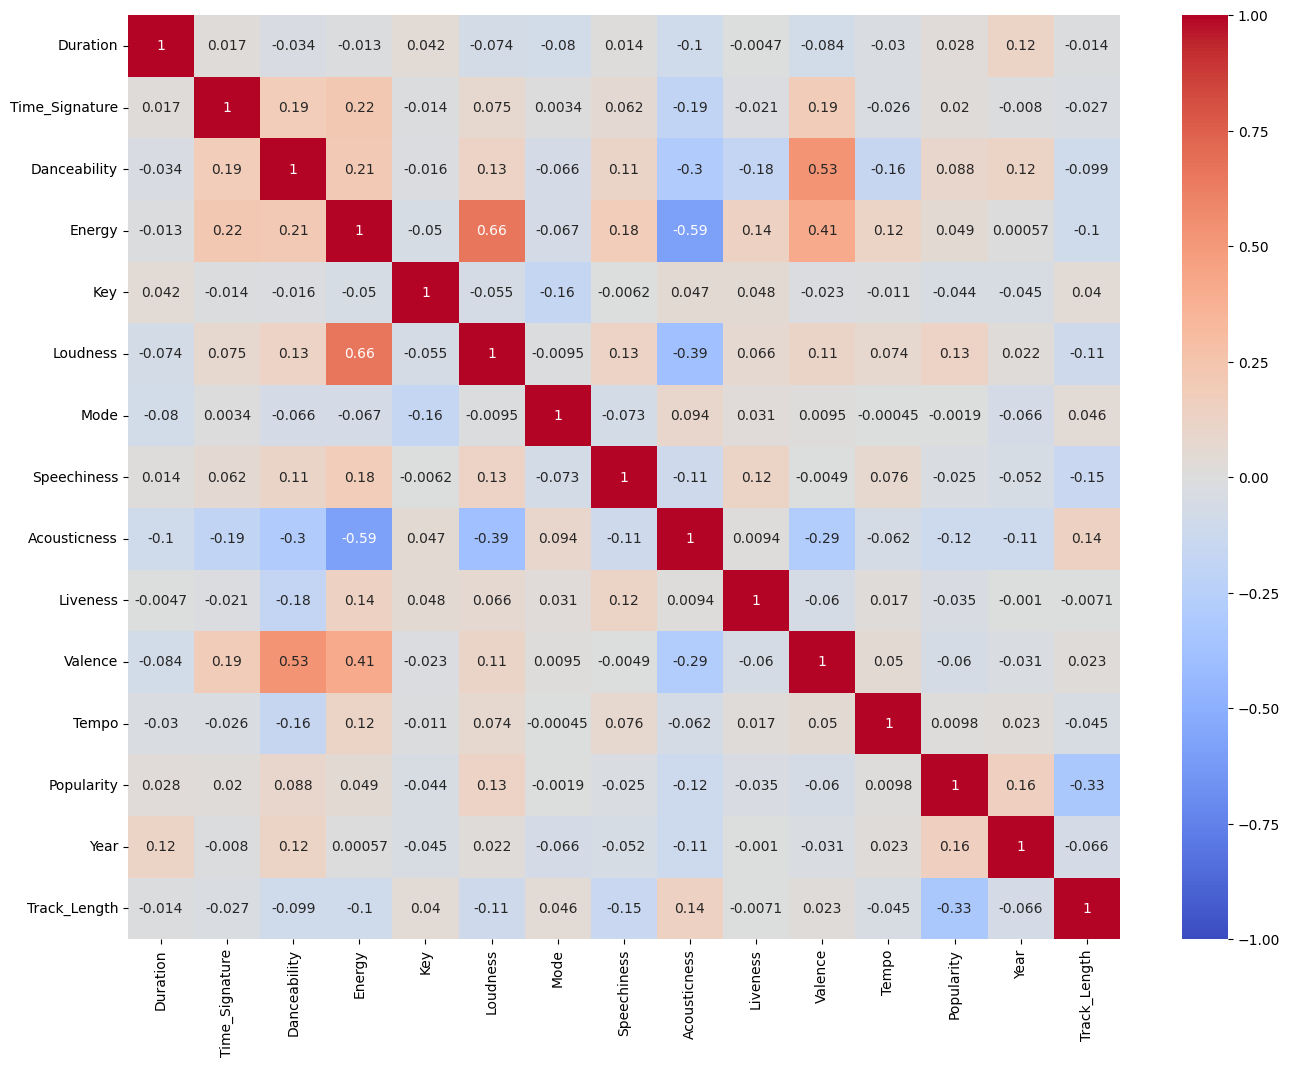

In [366]:
# Obtención únicamente de aquellas columnas numéricas.
numeric_columns = modified_dataset.select_dtypes(include=['number'])

# Cálculo de la matriz de correlaciones.
correlation_matrix = numeric_columns.corr()

# Impresión de la matriz de correlaciones en formato de heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Lo ideal, para poder determinar si dos variables están correlacionadas linealmente, es que el valor absoluto de la correlación entre ellas sea mayor a 0.7. Sin embargo, debido a que no se cuenta con dichos valores, se tomaron los tres valores más altos. De esta forma, se consideraron dignas de análisis las correlaciones entre las siguientes variables:

- *Energy* y *Loudness*: directamente lineal.
- *Acousticness* y *Energy*: inversamente lineal.
- *Danceability* y *Valence*: directamente lineal.

Sin embargo, es posible que haya correlaciones no lineales entre otras variables. Para identificarlas, se realizó el *scatter matrix* para cada combinación de variables:

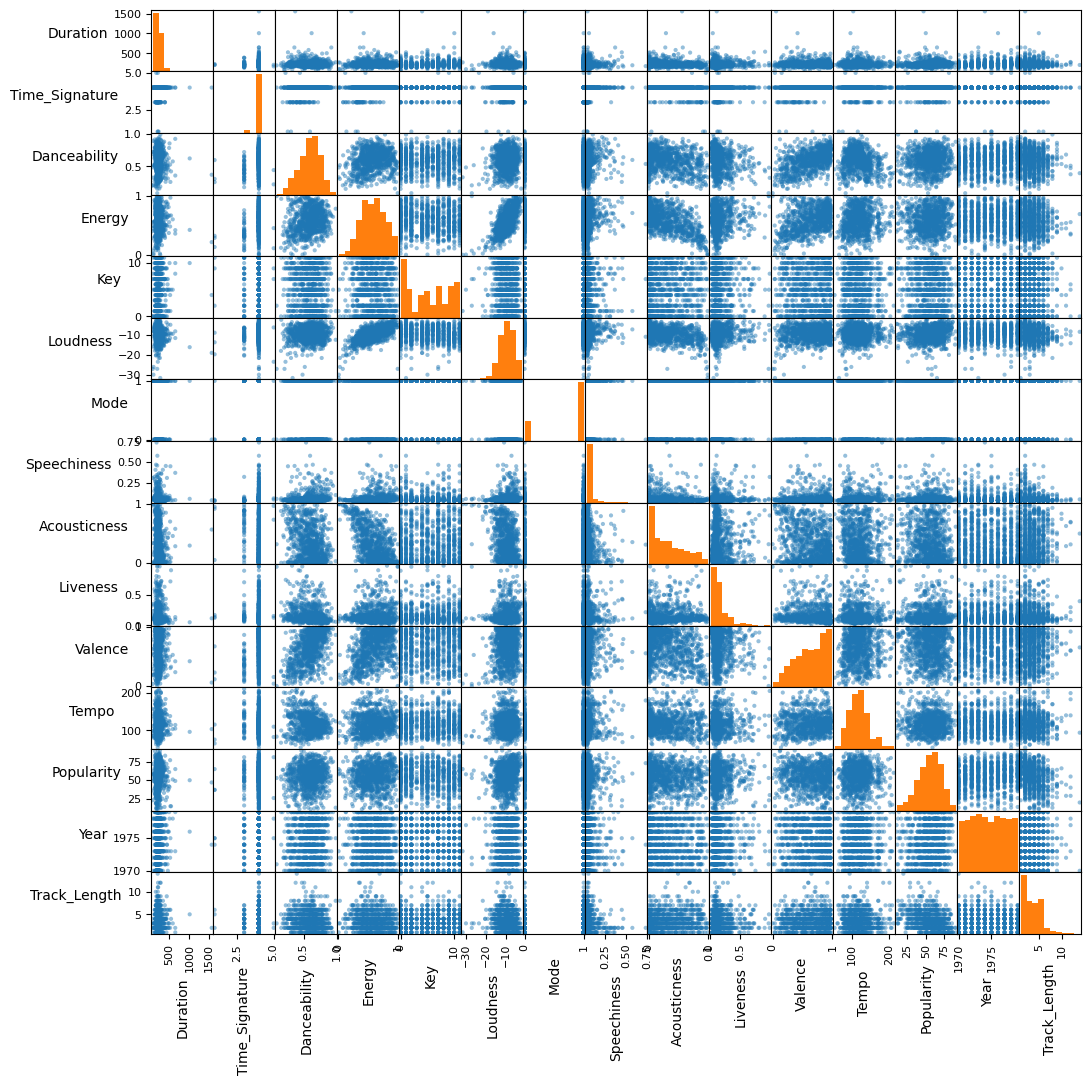

In [367]:
# Creación de la "scatter matrix".
axs = pd.plotting.scatter_matrix(numeric_columns, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})

# Acomodado de los ejes y presentación del gráfico.
for i in range(len(numeric_columns.columns)):
  for j in range(len(numeric_columns.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

De esta forma, a partir de la forma del *scatter plot* correspondiente, se identificaron posibles correlaciones, lineales y no lineales, entre los siguientes pares de variables:

- *Energy* y *Valence*.
- *Loudness* y *Valence*.
- *Acousticness* y *Loudness*.
- *Acousticness* y *Danceability*.

Con el objetivo de expandir el conjunto de posibles pares de variables correlacionadas, se graficaron las matrices de correlación de Spearman y Kendall. No obstante, estás no realizaron ningún aporte significativo:

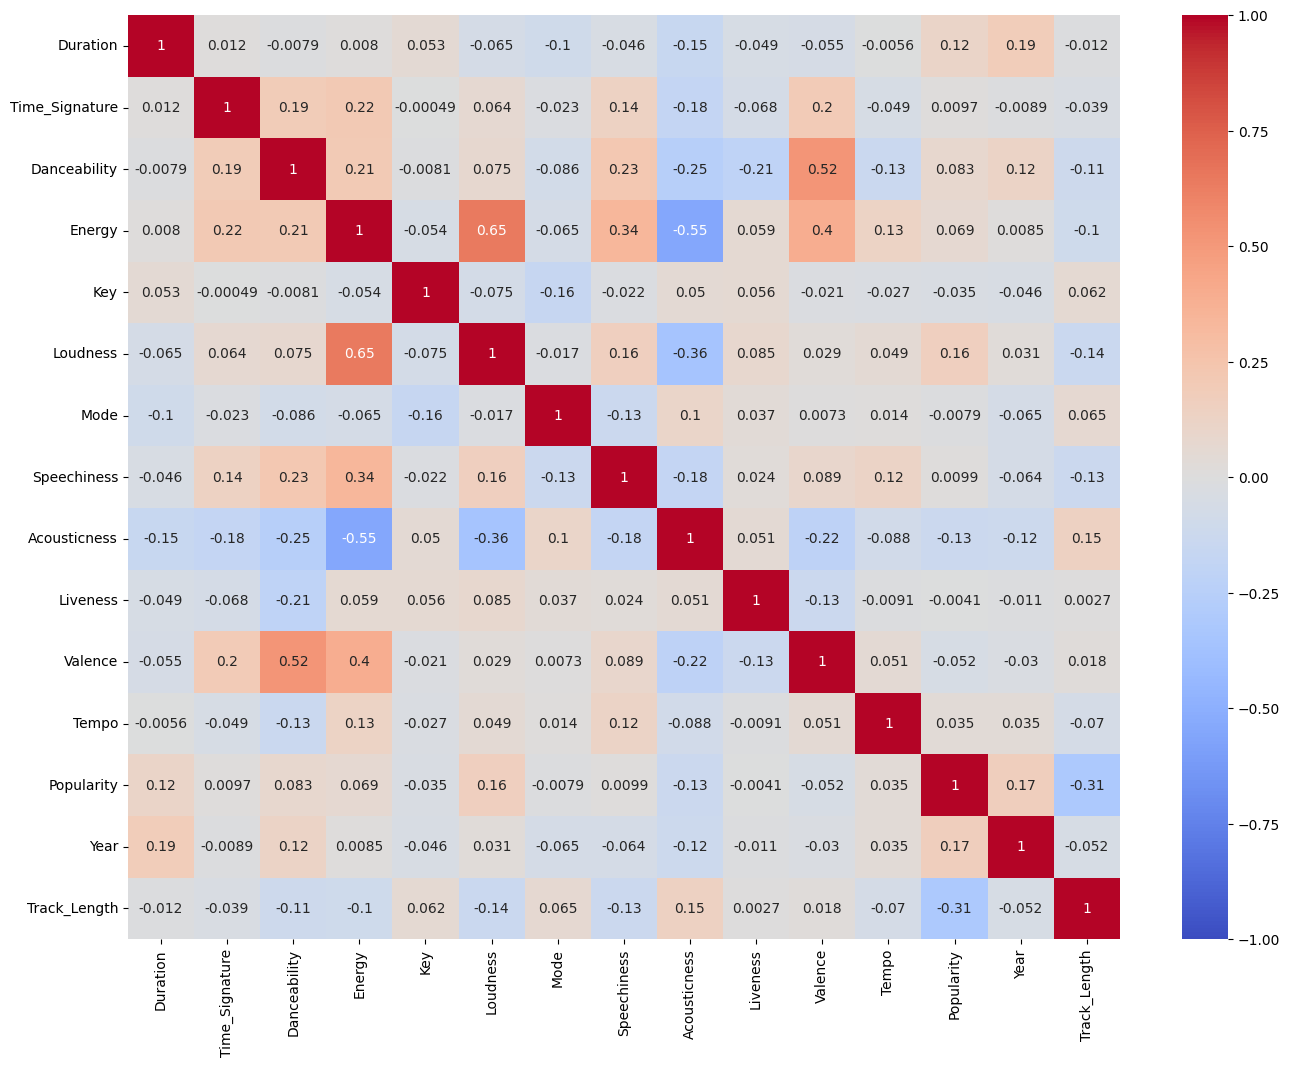

In [368]:
# Cálculo de la correlación de Spearman.
spearman_corr = numeric_columns.corr(method='spearman')
plt.figure(figsize=(16,12))
sns.heatmap(spearman_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()


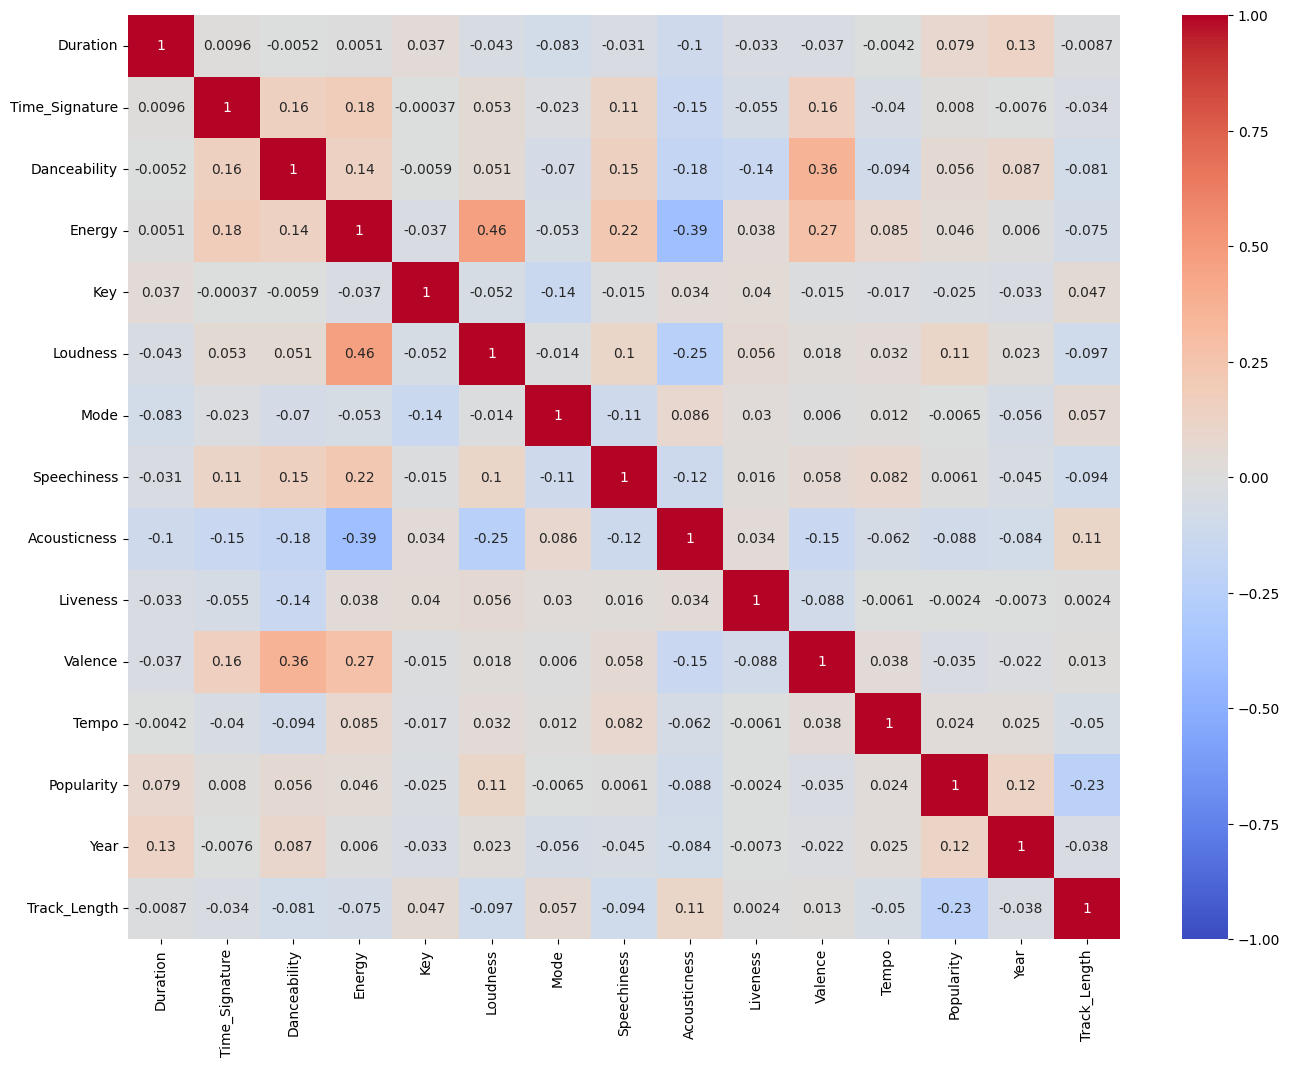

In [369]:
# Cálculo de la correlación de Kendall.
kendall_corr = numeric_columns.corr(method='kendall')
plt.figure(figsize=(16,12))
sns.heatmap(kendall_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Concluyendo lo hallado, los pares de variables de las que se sospecha una correlación y que, por consecuente, se decidió estudiarlas más a fondo son:

- *Energy* y *Valence*.
- *Energy* y *Loudness*.
- *Loudness* y *Valence*.
- *Acousticness* y *Energy*.
- *Danceability* y *Valence*.
- *Acousticness* y *Loudness*.
- *Acousticness* y *Danceability*.

### Definición de Funciones.

Debido a que la mayoría de las correlaciones son no lineales, definimos un conjunto de funciones que nos permitan realizar el ajuste de la curva:

In [370]:
def funcion_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

def funcion_lineal(x, a, b):
    return a * x + b

def funcion_radical(x, a, b):
    return a * np.sqrt(abs(x)) + b

def funcion_radical_decreciente(x, a, b, c):
    return a * np.sqrt(abs(c - x)) + b

def funcion_radical_decreciente_fija(x, a, b):
    return a * np.sqrt(1 - x) + b

### *Energy y Loudness*.

Las variables presentan, de acuerdo a la matriz de correlaciones de Pearson, una correlación lineal de 0.66 y, según la matriz de correlaciones Spearman, una correlación no lineal de 0.65.

Para estudiar la correlación entre las variables se realizó un *scatter plot* de ellas, intercalando cuál de ellas es laa variable dependiente y cuál, la independiente:

In [371]:
fig = px.scatter(clean_dataset, x="Loudness", y="Energy", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, y="Loudness", x="Energy", width=800, height=400)

fig.show()

Para afirmar las sospechas resultantes de los *scatter*, se realizó una regresión lineal de ellos para descubrir los parámetros óptimos de una posible función radical que describiera la curva:

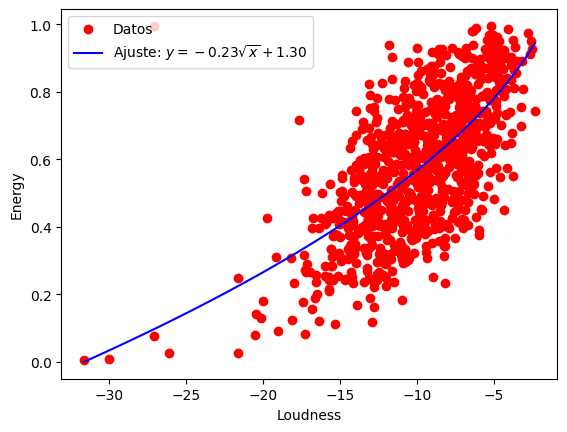

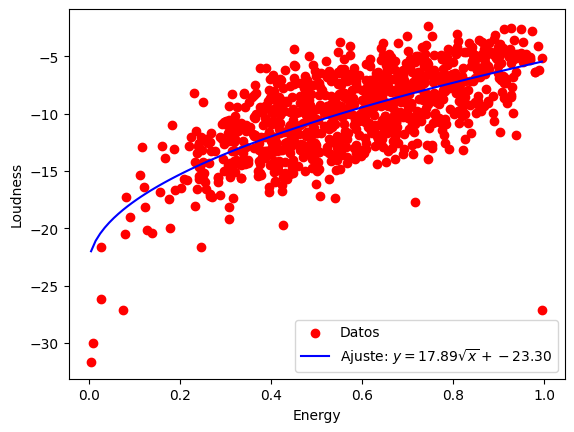

In [372]:
# Definición de las variables.
variable_independiente = "Loudness"
variable_dependiente = "Energy"
x_data = clean_dataset[variable_independiente]
y_data = clean_dataset[variable_dependiente]

# Ajuste de los datos a una curva radical.
params, covariance = curve_fit(funcion_radical, x_data, y_data)

# Extracción de los parámetros.
a_opt, b_opt = params

# Generación de puntos con la curva ajustada.
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_radical(x_fit, a_opt, b_opt)

# Gráfico de datos originales y curva ajustada.
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel(variable_independiente)
plt.ylabel(variable_dependiente)
plt.legend()
plt.show()

# ------------------------------------------------------------

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(funcion_radical, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = funcion_radical(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend()
plt.show()

Pareciera existir una relación radical entre las variables: a medida que la variable en el eje X incrementa, la variable en el eje Y también lo hace, pero a un ritmo más lento.

### *Acousticness* y *Energy*.

En lugar de una relación lineal entre ambas, se observa algo más parecido a una relación radical decreciente:

In [373]:
fig = px.scatter(clean_dataset, x="Acousticness", y="Energy", width=800, height=400)

fig.show()

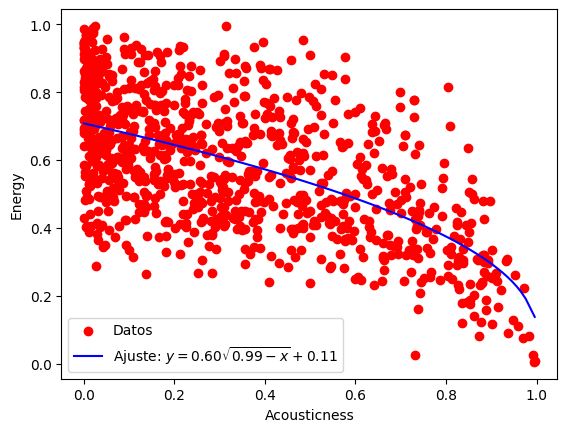

In [374]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Energy"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(funcion_radical_decreciente, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_radical_decreciente(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{{c_opt:.2f} - x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.legend()
plt.show()

#### Conclusiones.

- Efectivamente, pareciera haber una relación radical decreciente entre las variables. Esto sugiere que: al incrementar la variable en el eje x, la variable en el y decrece rápidamente al inicio, pero el efecto disminuye gradualmente.

### *Danceability* y *Valence*.

Se realizó un *scatter plot* de las variables para verificar si existe alguna relación entre ellas:

In [375]:
fig = px.scatter(clean_dataset, x="Valence", y="Danceability", width=800, height=400)

fig.show()

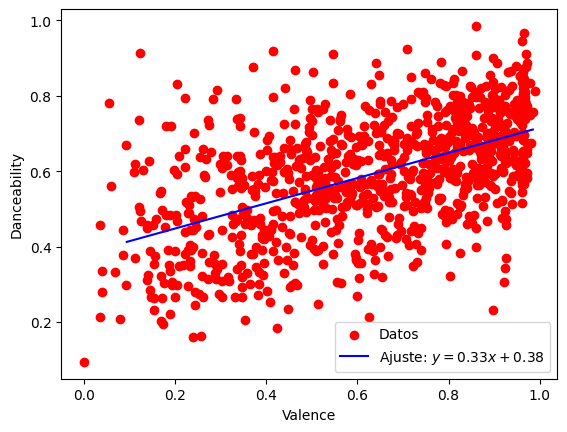

In [376]:

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Danceability"]  # Valores de la variable independiente
y_data = clean_dataset["Valence"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(funcion_lineal, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_lineal(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}x + {b_opt:.2f}$', color='blue')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.legend()
plt.show()

#### Conclusiones.

- No pareciera haber una relación de las variables, sino que más bien se trata de una nube amorfa.

### Energy y Valence.

Observando los scatters, se puede observar una relación parecida a la de una función radical más compleja:

In [377]:
fig = px.scatter(modified_dataset, x="Valence", y="Energy", width=800, height=400)

fig.show()

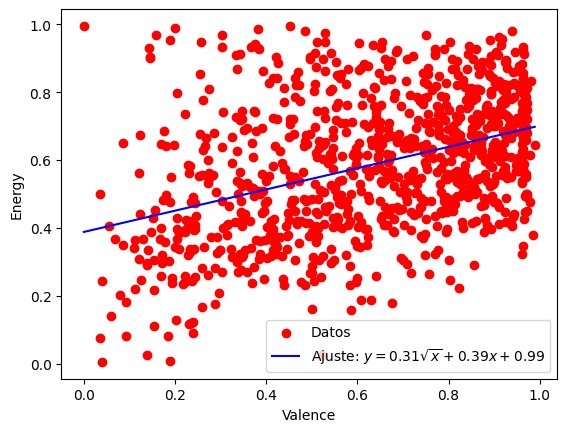

In [378]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Valence"]  # Valores de la variable independiente
y_data = clean_dataset["Energy"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(funcion_lineal, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_lineal(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}x + {c_opt:.2f}$', color='blue')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend()
plt.show()

### Acousticness y Loudness.

Pareciera que las variables tienen una relación radical decreciente:

In [379]:
fig = px.scatter(modified_dataset, x="Acousticness", y="Loudness", width=800, height=400)

fig.show()

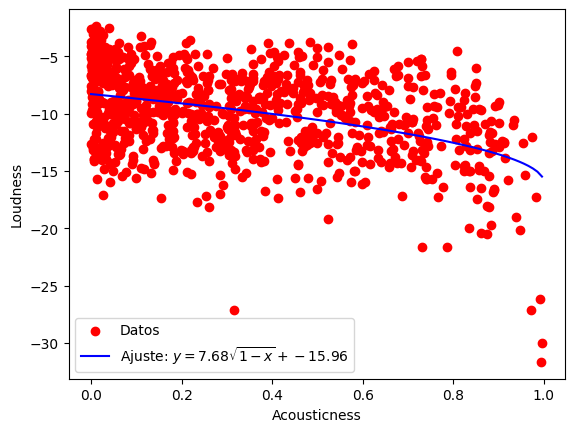

In [380]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Loudness"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(funcion_radical_decreciente_fija, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_radical_decreciente_fija(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{1 - x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.legend()
plt.show()

### Loudness y Valence.

In [381]:
fig = px.scatter(clean_dataset, x="Valence", y="Loudness", width=800, height=400)

fig.show()

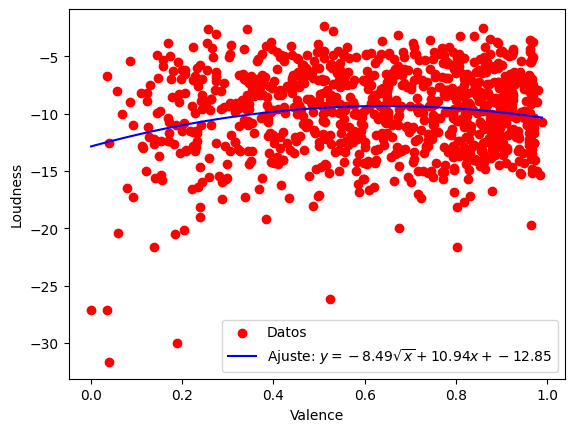

In [382]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Valence"]  # Valores de la variable independiente
y_data = clean_dataset["Loudness"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(funcion_cuadratica, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_cuadratica(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}x + {c_opt:.2f}$', color='blue')
plt.xlabel('Valence')
plt.ylabel('Loudness')
plt.legend()
plt.show()


### Acousticness y Danceability.

In [383]:
fig = px.scatter(clean_dataset, x="Acousticness", y="Danceability", width=800, height=400)

fig.show()

Parámetros óptimos: a = -0.18723103652402417, b = -0.003916424456478884


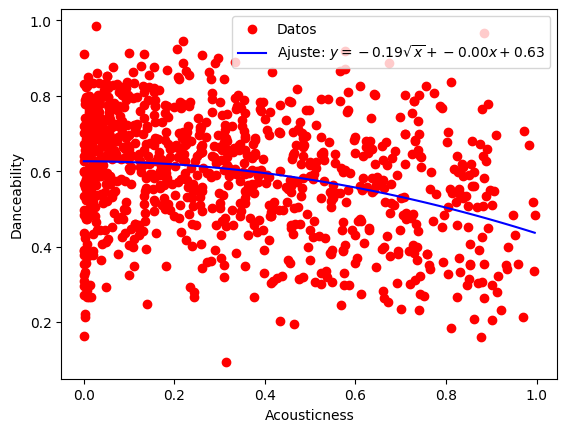

In [384]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Danceability"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(funcion_cuadratica, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params
print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_cuadratica(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}x + {c_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.show()


## 2.3 - Análisis Multivariado.

### *PCA*.

Fue planteada la posibilidad de utilizar PCA. Sin embargo, considerando la naturaleza de las variables, que no se relacionan linealmente y, que como puede observarse abajo, se requeriría del uso de al menos ocho variables para obtener una varianza explicada significativa (considérese, 70 %), la idea fue descartada.

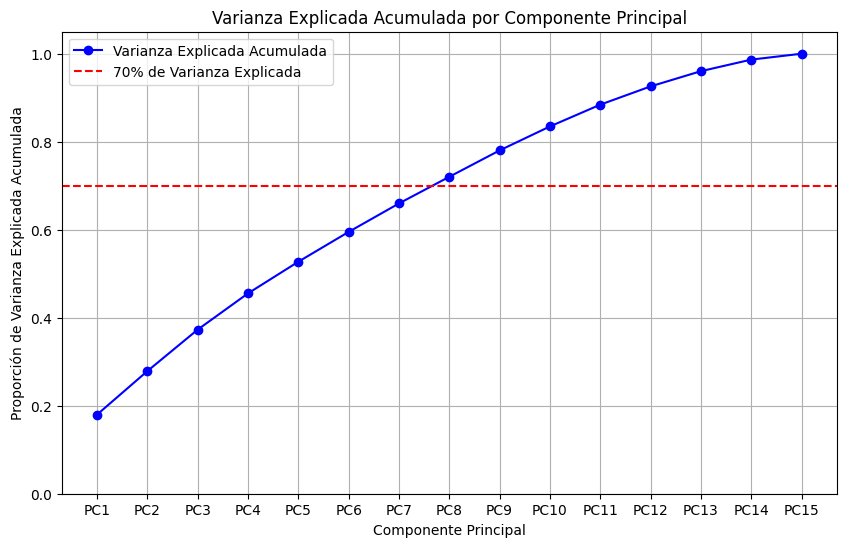

In [385]:
# Estandarización de las columnas numéricas.
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(numeric_columns)

# Aplicación de PCA.
pca = PCA()
pca.fit_transform(scaled_columns)

# Cálculo de la varianza explicada acumulada.
autovalores = pca.explained_variance_
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='b', label='Varianza Explicada Acumulada')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% de Varianza Explicada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1), labels=[f'PC{i+1}' for i in range(len(varianza_explicada_acumulada))])
plt.ylim(0, 1.05)
plt.legend()
plt.grid()
plt.show()


### *UMAP*.

Debido a que las variables del *dataset* no se relacionan linealmente, se decidió optar por una técnica no lineal de reducción de la dimensionalidad. Entre las opciones, se evalúo la posibilidad de utilizar t-SNE o UMAP. Se decidió optar por esta última, puesto a que:

- Es, en general, más rápida que t-SNE.
- Preserva más de la estructura global que t-SNE.
- Permite agregar nuevos datos.

Con esto en cuenta, se aplicó UMAP al conjunto de datos, reduciendo la dimensionalidad a dos variables:

In [386]:
# Aplicación de UMAP.
umap_model = umap.UMAP(n_components=2, random_state=100, n_neighbors=5, n_jobs=1)
X_umap = umap_model.fit_transform(scaled_columns)

Utilizando el gráfico del codo, se determinó el número de clusters óptimo:

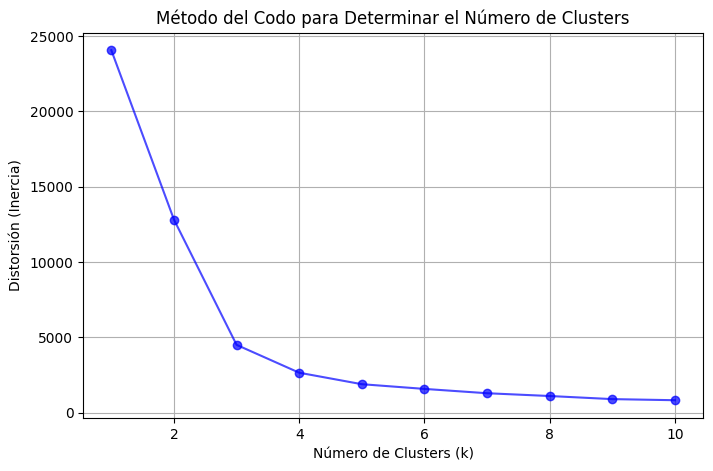

In [387]:
# Determinar el número óptimo de clusters usando el método del codo
def plot_elbow_method(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bo-', alpha=0.7)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Distorsión (Inercia)')
    plt.title('Método del Codo para Determinar el Número de Clusters')
    plt.grid(True)
    plt.show()

# Mostrar el gráfico del método del codo
plot_elbow_method(X_umap)

Se observa que el número de clusters pareciera ser de tres. Se realiza la comprobación mediante el coeficiente de Silhouette y el índice de Davies-Boulding:

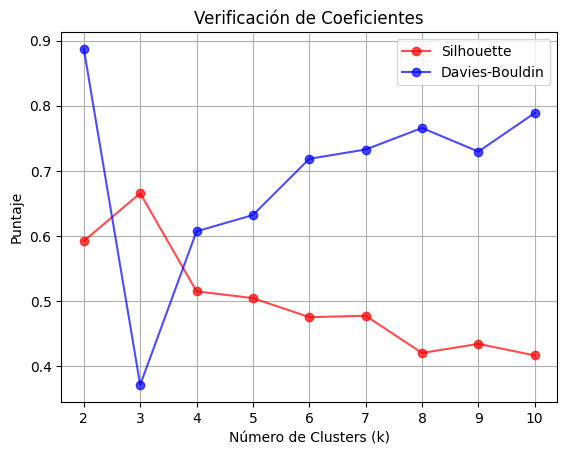

In [388]:
silhouette = []
davies_bouldin = []

K = range(2, 11)

for k in K:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_umap)
    
    silhouette.append(silhouette_score(X_umap, clusters))
    
    davies_bouldin.append(davies_bouldin_score(X_umap, clusters))

# Gráfico para el índice de Silhouette
plt.plot(K, silhouette, '-ro', label='Silhouette', alpha=0.7)

# Gráfico para el índice de Davies-Bouldin
plt.plot(K, davies_bouldin, '-bo', label='Davies-Bouldin', alpha=0.7)

plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntaje')
plt.title('Verificación de Coeficientes')
plt.legend()
plt.grid(True)
plt.show()

Mientras más alto es el coeficiente de Silhouette y menor es el índice de Davies-Boulding, mejor es el *k* elegido. Con esto en cuenta, es fácil notar que tres *clusters* es la elección óptima.

Se visualizó la proyección en 2D realizada por UMAP, pintando las muestras según el *cluster* al que pertenecen:

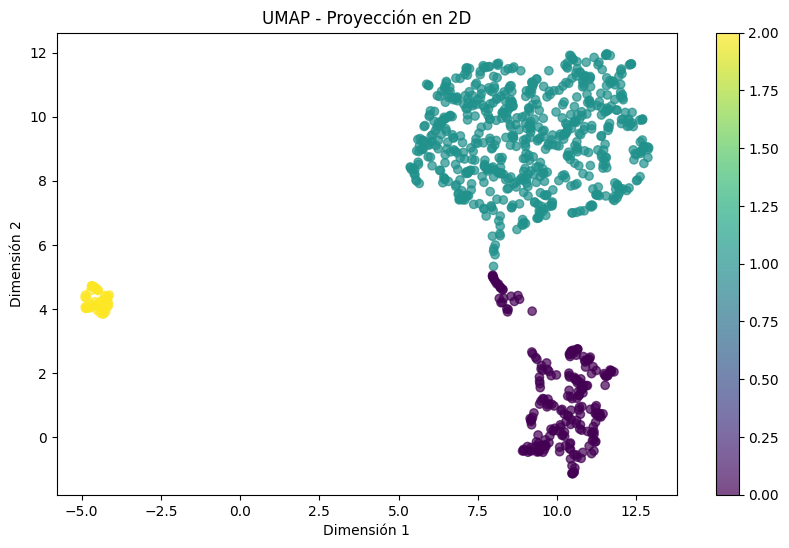

In [389]:
# Elección del número de clusters, basado en el análisis anterior.
n_clusters = 3

# Aplicación de K-Means clustering.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Creación de un DataFrame para almacenar los resultados de UMAP.
umap_df = pd.DataFrame(X_umap, columns=['Dim 1', 'Dim 2'])
umap_df['Cluster'] = clusters

# Visualización de la proyección 2D proporcionada por UMAP.
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clusters)
plt.title('UMAP - Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()


Al analizar en detalle lo que motivó la clusterización realizada, nos percatamos de que fueron dos variables principalmente:

- *Time_Signature*.
- *Mode*.

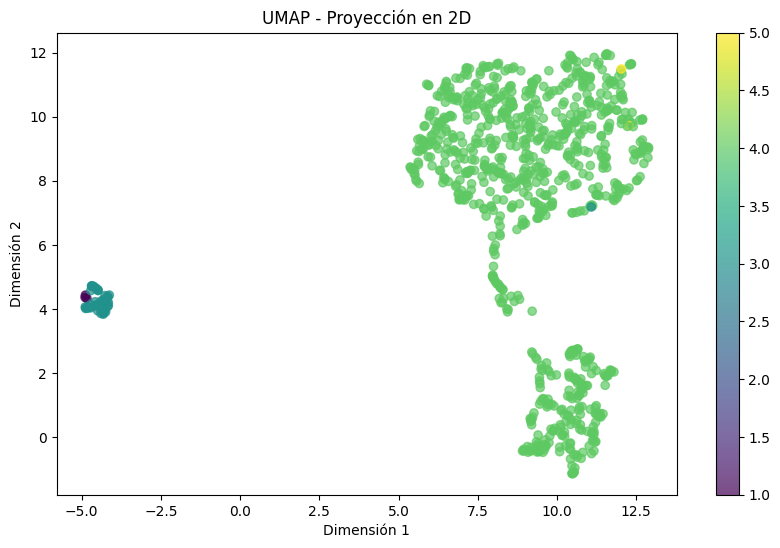

In [390]:
# Visualización de la proyección 2D proporcionada por UMAP, pintando la variable "Time_Signature".
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = modified_dataset["Time_Signature"])
plt.title('UMAP - Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

Como es posible observar, hay dos grupos bien diferenciados: aquel en el que el compás (*Time_Signature*) es 3 y aquel en el que es de 4.

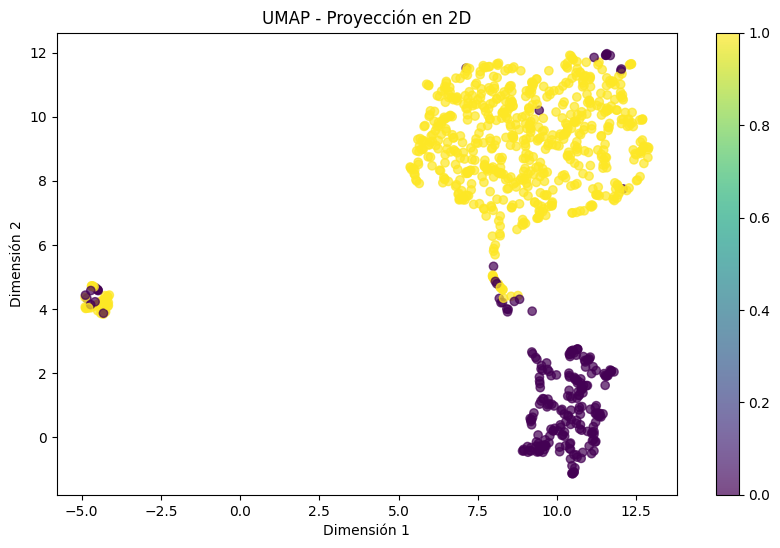

In [391]:
# Visualización de la proyección 2D proporcionada por UMAP, pintando la variable "Mode".
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = modified_dataset["Mode"])
plt.title('UMAP - Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

Dentro del grupo con compás de 4, aquellas muestras con tono (*Mode*) alto corresponden al tercer *cluster* identificado mediante *K-MEANS*.

Se comprobó si, dentro de las muestras de cada *cluster*, existe alguna correlación entre las variables que no pudo ser captada en el análisis bivariado:

In [392]:
clusters_dataset = modified_dataset.copy()

# Agregado de la columna con el cluster perteneciente.
clusters_dataset['Cluster'] = clusters

# Filtrado de registros para cada cluster.
df_0 = clusters_dataset[clusters_dataset['Cluster'] == 0]
df_1 = clusters_dataset[clusters_dataset['Cluster'] == 1]
df_2 = clusters_dataset[clusters_dataset['Cluster'] == 2]

print(f"Número de muestras en el primer cluster: {df_0.shape[0]}")
print(f"\nNúmero de muestras en el segundo cluster: {df_1.shape[0]}")
print(f"\nNúmero de muestras en el tercer cluster: {df_2.shape[0]}")


Número de muestras en el primer cluster: 224

Número de muestras en el segundo cluster: 646

Número de muestras en el tercer cluster: 45


El número de muestras en el tercer *cluster* es demasiado chico para poder determinar con seguridad si existen correlaciones entre las variables dentro del grupo. Por lo tanto, solo se utilizaron los dos primeros grupos para el cálculo de la matriz de correlación:

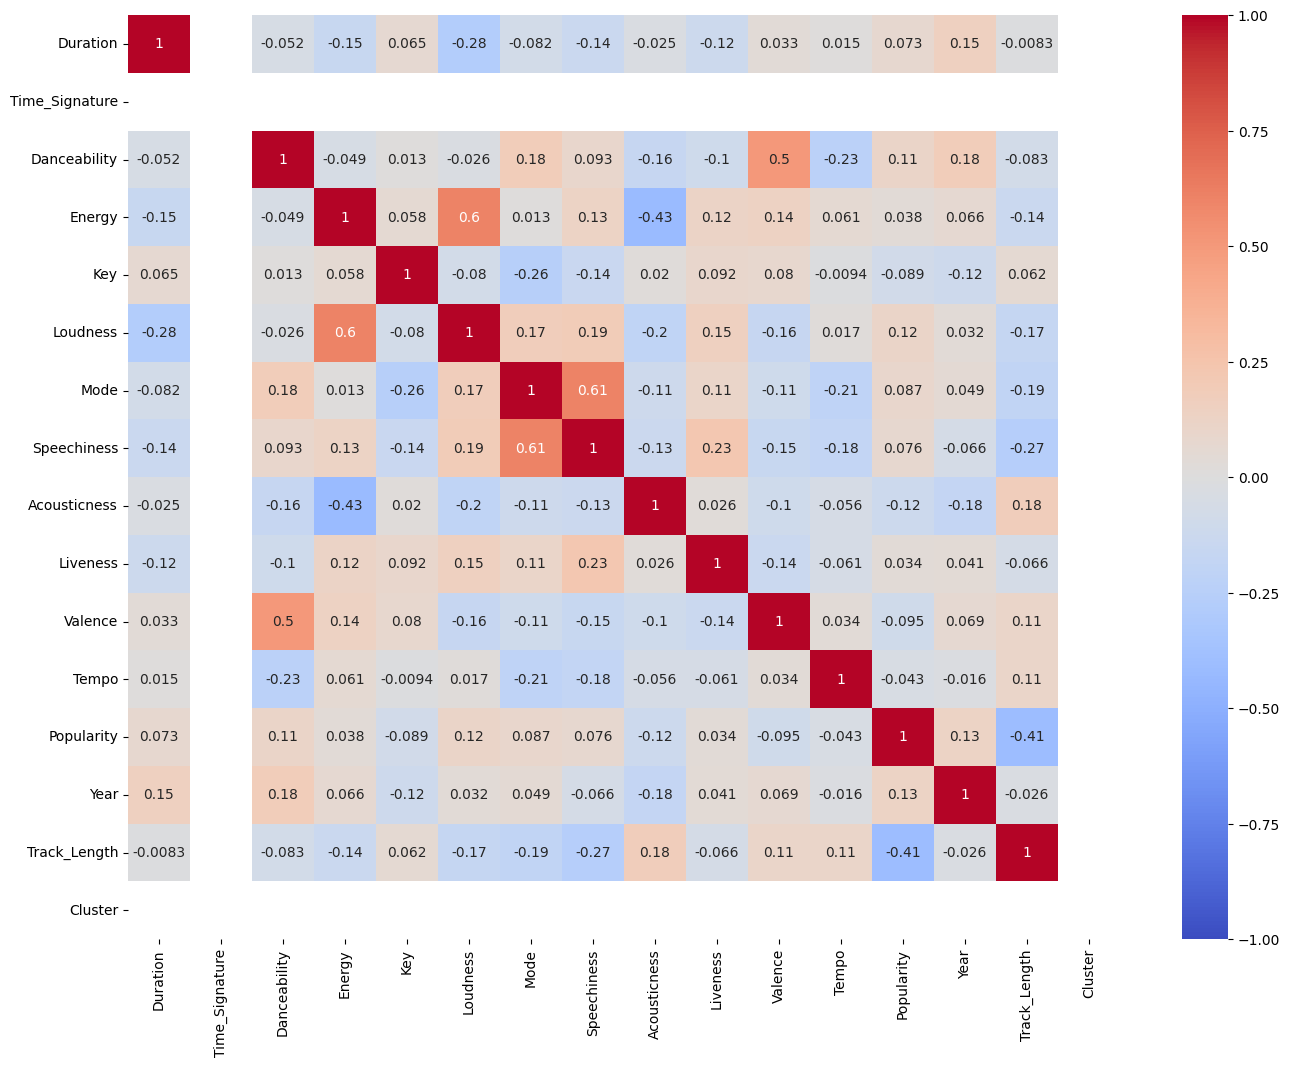

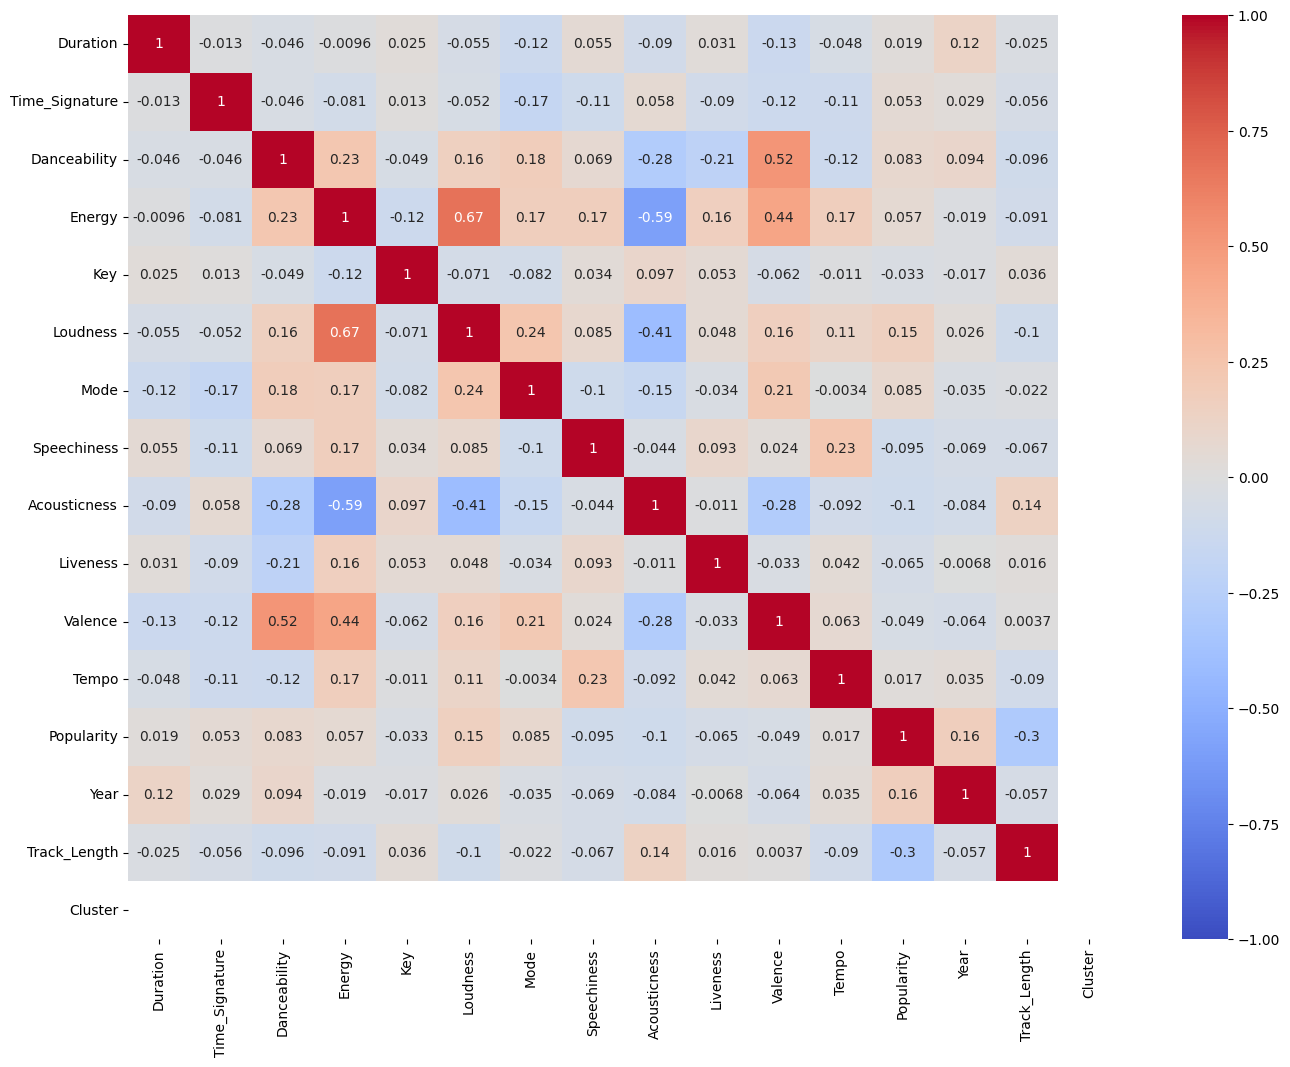

In [393]:
# Cálculo de la matriz de correlaciones.
correlation_matrix = df_0.select_dtypes(include=['number']).corr()

# Impresión de la matriz de correlaciones en formato de heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

# Cálculo de la matriz de correlaciones.
correlation_matrix = df_1.select_dtypes(include=['number']).corr()

# Impresión de la matriz de correlaciones en formato de heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Descartando las correlaciones ya estudiadas en la sección *2.2. Análisis Bivariado*, es posible observar una correlación con un valor significativo entre *Speechiness* y *Mode*. Sin embargo, esto no es significativo, ya que la proporción de valores en la variable *Mode* son altamente desproporcionados:

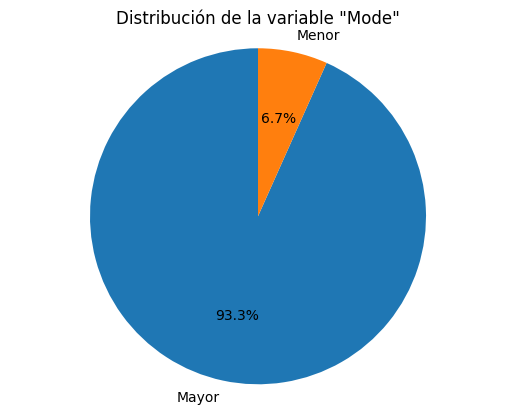

In [394]:
# Cálculo de valores.
valores_mode = df_0["Mode"].value_counts()

# Creación del gráfico de torta.
plt.pie(valores_mode, labels=["Mayor", "Menor"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.title('Distribución de la variable "Mode"')
plt.show()

# 3. *Modelado y Predicción*.

## 3.1. Regresión Lineal Múltiple.

La variable objetivo es la popularidad. Mediante una regresión lineal múltiple, se buscó observar si es posible predecirla a través de las variables con las que se cuenta en el *dataset*.

In [395]:
# Filtramos solo las columnas numéricas en X
X = modified_dataset.select_dtypes(include='number')

# Se separa la variable objetivo de la variable predictoria.
X = X.drop('Popularity', axis=1)
y = modified_dataset["Popularity"]

# Se estandarizan las variables predictoras.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Se verifica que las estandarizaciones hayan funcionado correctamente:

In [396]:
# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(pd.DataFrame(X).describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
        Duration  Time_Signature  Danceability    Energy       Key  Loudness  \
mean  228.642623        3.945355      0.591244  0.583423  5.195628 -9.869511   
std    83.614792        0.275291      0.155735  0.199148  3.567109  3.697958   

          Mode  Speechiness  Acousticness  Liveness   Valence       Tempo  \
mean  0.747541     0.060758       0.32985  0.170476  0.627448  119.091657   
std   0.434661     0.067108       0.27564  0.146230  0.250454   26.873788   

             Year  Track_Length  
mean  1974.504918      3.602186  
std      2.850914      1.925641  

Medias y desviaciones estándar después del escalado:
          Duration  Time_Signature  Danceability        Energy           Key  \
mean -1.669581e-16    1.533685e-16  2.795578e-16  1.358962e-17  8.542044e-17   
std   1.000547e+00    1.000547e+00  1.000547e+00  1.000547e+00  1.000547e+00   

          Loudness          Mode   Speechiness  Acousticness      Liveness  \
m

La media de las variables dan cercanas a 0 mientras que el desvío estándar, a 1. Por lo tanto, la estandarización funcionó correctamente.

In [397]:
# Aseguramos que los índices de y y X_scaled_df_ estén alineados
y = y.reset_index(drop=True)
X_scaled_df = X_scaled_df.reset_index(drop=True)

# Se agrega una constante como característica, para estimar la ordenada al origen.
X_scaled_df = sm.add_constant(X_scaled_df)

# Se ajusta el modelo
model = sm.OLS(y, X_scaled_df).fit()

# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     11.85
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.56e-25
Time:                        15:51:45   Log-Likelihood:                -3737.9
No. Observations:                 915   AIC:                             7506.
Df Residuals:                     900   BIC:                             7578.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             55.1311      0.479    114.

El coeficiente de determinación, R-squared, es extremadamente bajo. Mediante el modelo propuesto, únicamente se está explicando el 15.6 % de la variabilidad de la popularidad. Además, es destacable notar que los errores estándar son relativamente altos. Se concluyó entonces que no es posible predecir la variable *Popularity* a través de un modelo lineal.

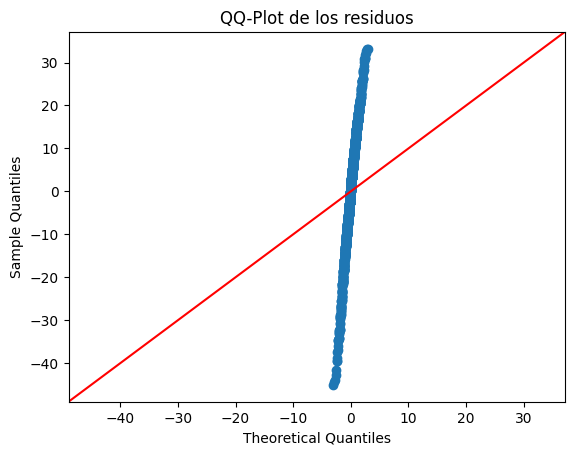

In [398]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

Además, como puede observarse en el gráfico de arriba, independientemente de si R-squared hubiese dado un valor alto, al no cumplirse el supuesto de normalidad, el modelo no sería válido.

## 3.2. Regresión Polinómica.

Debido a que, como se comprobó en el análisis bivariado, la mayoría de nuestras variables no se relacionan linealmente, se decidió realizar la prueba utilizando una regresión polinómica. Para ello, se separaron los datos en entrenamiento y en prueba, se entrenó el modelo y se obtuvo un *R-squared* correspondiente a la prueba de este utilizando los datos de prueba:

In [399]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Crear el modelo polinómico y transformar los datos de entrenamiento
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Transformar los datos de prueba con el mismo polinomio
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluar el modelo en los datos de prueba
print("R^2 en datos de prueba:", model.score(X_test_poly, y_test))


R^2 en datos de prueba: -0.0446604979439309


Se obtuvo un R-squared menor a 0, lo que indica que el modelo precide peor que una recta. Fue, entonces, descartado el modelo.

## 3.3. Árbol de Decisión y *Random Forest*.

Como última opción, se dispuso realizar la prueba utilizando árboles de decisión y un *random forest*:

In [400]:
# División de los datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Árbol de decisión.
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Evaluación del modelo.
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

# Métricas en el árbol de decisión.
print("Árbol de Decisión:")
print("\nEntrenamiento R^2:", r2_score(y_train, y_pred_train))
print("Prueba R^2:", r2_score(y_test, y_pred_test))

# Random Forest.
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Evaluación del modelo.
y_pred_train = forest_model.predict(X_train)
y_pred_test = forest_model.predict(X_test)

# Métricas en el árbol de decisión.
print("\nRandom Forest:")

print("\nEntrenamiento R^2:", r2_score(y_train, y_pred_train))
print("Entrenamiento MAE:", mean_absolute_error(y_train, y_pred_train))
print("Entrenamiento RMSE:", root_mean_squared_error(y_train, y_pred_train))

print("\nPrueba R^2:", r2_score(y_test, y_pred_test))
print("Prueba MAE:", mean_absolute_error(y_test, y_pred_test))
print("Prueba RMSE:", root_mean_squared_error(y_test, y_pred_test))

Árbol de Decisión:

Entrenamiento R^2: 1.0
Prueba R^2: -0.6449768612039326

Random Forest:

Entrenamiento R^2: 0.8723665351562109
Entrenamiento MAE: 4.370328125
Entrenamiento RMSE: 5.538871289012771

Prueba R^2: 0.06748127141733629
Prueba MAE: 12.416254545454546
Prueba RMSE: 15.312187576033555


Para ambos modelos, las métricas nos indican que estos no son buenos. En particular, el valor de *R-squared* obtenido para el modelo construido utilizando árboles de decisión nos indica que este predice peor que un simple promedio entre los datos. Por consiguiente, se concluyó que no es posible realizar la predicción de la popularidad mediante las herramientas o variables con las que se cuenta.

# 4. *Test* de Hipótesis.

A partir de la información obtenida a lo largo del análisis, se plantearon las siguientes hipótesis para el *dataset* de estudio:

## 4.1. Un tono mayor se relaciona con un nivel más alto de energía.

In [401]:
from scipy.stats import shapiro

# Separamos el DataFrame en dos conjuntos
dataset_mode_0 = clean_dataset[clean_dataset["Mode"] == 0]
dataset_mode_1 = clean_dataset[clean_dataset["Mode"] == 1]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_mode_0['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_mode_1['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.983, p-valor=0.007
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.990, p-valor=0.000


No son normales.

In [402]:
import scipy.stats as stats

# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_mode_0["Energy"], dataset_mode_1["Energy"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.705, p-valor=0.401


Son homocedásticos.

In [403]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_mode_0["Energy"], dataset_mode_1["Energy"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la energía entre las canciones con moda 0 y moda 1.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la energía entre canciones con moda 0 y moda 1.")

Test de Mann-Whitney U para Energy: Estadístico=90302.500, p-valor=0.010
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la energía entre canciones con moda 0 y moda 1.


## 4.2. Un tono mayor se relaciona con una valencia más alta.

In [404]:
from scipy.stats import shapiro

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_mode_0['Valence'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_mode_1['Valence'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.947, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.944, p-valor=0.000


No son normales.

In [405]:
import scipy.stats as stats

# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_mode_0["Valence"], dataset_mode_1["Valence"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.129, p-valor=0.720


Son homocedásticos.

In [406]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_mode_0["Valence"], dataset_mode_1["Valence"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valencia entre las canciones con moda 0 y moda 1.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valencia entre canciones con moda 0 y moda 1.")

Test de Mann-Whitney U para Energy: Estadístico=82402.500, p-valor=0.732
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la valencia entre las canciones con moda 0 y moda 1.


## 4.3. La frecuencia de uso de las tonalidades usadas en los 70's son representativas del último siglo.

In [407]:
test = wilcoxon(combined["Original"], combined["Ampliado"])

print(test.pvalue)

1.0


No hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, no existe una diferencia signfificativa en la frecuencia de uso de las tonalidades o *keys* en la década de los 70's y en los últimos cien años.

## 4.4. Un nombre de canción más corto está ligado a una popularidad más alta, puesto a que es más fácil de recordar.

In [408]:
high_popularity_subset = modified_dataset[modified_dataset["Popularity"] >= 75]
low_popularity_subset = modified_dataset[modified_dataset["Popularity"] < 75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_popularity_subset['Track_Length'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_popularity_subset['Track_Length'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.874, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.908, p-valor=0.000


In [409]:
stat, p = stats.levene(high_popularity_subset["Track_Length"], low_popularity_subset["Track_Length"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=3.155, p-valor=0.076


In [410]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(high_popularity_subset["Track_Length"], low_popularity_subset["Track_Length"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.")

Test de Kruskal-Wallis para Tempo: Estadístico=22.235, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.


In [411]:
high_track_word_length_subset = modified_dataset[modified_dataset["Track_Length"] > 3]
low_track_word_length_subset = modified_dataset[modified_dataset["Track_Length"] <= 3]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_track_word_length_subset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_track_word_length_subset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.986, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.983, p-valor=0.000


In [412]:
stat, p = stats.levene(high_track_word_length_subset["Popularity"], low_track_word_length_subset["Popularity"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=9.649, p-valor=0.002


In [413]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(high_track_word_length_subset["Popularity"], low_track_word_length_subset["Popularity"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre las canciones con una alta cantidad de palabras y una baja cantidad de palabras.")

Test de Kruskal-Wallis para Tempo: Estadístico=62.172, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la popularidad entre las canciones con una alta cantidad de palabras y una baja cantidad de palabras.


## 4.5. Los temas largos no se pueden bailar.

In [414]:
high_danceability_dataset = modified_dataset[modified_dataset["Danceability"] >= 0.75]
low_danceability_dataset = modified_dataset[modified_dataset["Danceability"] < 0.75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_danceability_dataset['Duration'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_danceability_dataset['Duration'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.830, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.638, p-valor=0.000


In [415]:
# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(high_danceability_dataset["Duration"], low_danceability_dataset["Duration"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.199, p-valor=0.656


In [416]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(high_danceability_dataset["Duration"], low_danceability_dataset["Duration"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")

Test de Mann-Whitney U para Energy: Estadístico=60771.500, p-valor=0.298
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.


Con un p_valor de 0.303, no hay suficiente evidencia para rechazar la hipótesis nula, lo que señala que no hay una diferencia significativa en la duraciión entre las canciones con bailabilidad alta y bailabilidad baja. Es decir, una canción es igualmente bailable, independientemente de su duración.

## 4.6. La tonalidad de un tema no tiene un efecto significativo en la valencia.

In [417]:
# Chequeo de la condición de normalidad.
for category in clean_dataset['Key'].unique():
    data = clean_dataset[clean_dataset['Key'] == category]['Valence']
    stat, p_value = stats.shapiro(data)
    
    if (p_value < 0.05):
        print("No se cumple el supuesto de normalidad para cada grupo.")
        break

No se cumple el supuesto de normalidad para cada grupo.


In [418]:
# Test de Levene
stat, p_value = stats.levene(*[clean_dataset[clean_dataset['Key'] == category]['Valence'] for category in clean_dataset['Key'].unique()])
print(f'p-value Levene: {p_value}')

p-value Levene: 0.8449888729974425


In [419]:
# Test de Kruskal-Wallis.
stat, p = stats.kruskal(*[clean_dataset[clean_dataset['Key'] == category]['Valence'] for category in clean_dataset['Key'].unique()])
print(f"Test de Kruskal-Wallis: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Definición del nivel de significancia.
alpha = 0.05

# Interpretación de los resultados.
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valencia entre las distintas tonalidades.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valencia entre las distintas tonalidades.")

Test de Kruskal-Wallis: Estadístico=4.264, p-valor=0.962
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la valencia entre las distintas tonalidades.


Explicar la popularidad en función de otras variables.

KW  -> n grupos (2 o más).

## 4.7. La bailabilidad está relacionado con la popularidad.

In [420]:
high_danceability_dataset = modified_dataset[modified_dataset["Danceability"] >= 0.75]
low_danceability_dataset = modified_dataset[modified_dataset["Danceability"] < 0.75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_danceability_dataset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_danceability_dataset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.976, p-valor=0.010
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.984, p-valor=0.000


In [421]:
# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(high_danceability_dataset["Popularity"], low_danceability_dataset["Popularity"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=1.534, p-valor=0.216


In [422]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(high_danceability_dataset["Popularity"], low_danceability_dataset["Popularity"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la popularidad entre las canciones con bailabilidad alta y bailabilidad baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre las canciones con bailabilidad alta y bailabilidad baja.")

Test de Mann-Whitney U para Energy: Estadístico=61007.500, p-valor=0.262
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la popularidad entre las canciones con bailabilidad alta y bailabilidad baja.


In [423]:
px.scatter(modified_dataset, x="Danceability", y="Popularity").show()

## 4.8. Energía y bailabilidad.

In [424]:
high_danceability_dataset = modified_dataset[modified_dataset["Danceability"] >= 0.75]
low_danceability_dataset = modified_dataset[modified_dataset["Danceability"] < 0.75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_danceability_dataset['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_danceability_dataset['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.982, p-valor=0.051
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.989, p-valor=0.000


In [425]:
# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(high_danceability_dataset["Energy"], low_danceability_dataset["Energy"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=9.621, p-valor=0.002


In [426]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(high_track_word_length_subset["Energy"], low_track_word_length_subset["Energy"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la energía entre las canciones con alta bailabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la energía entre las canciones con una alta bailabilidad y una baja bailabilidad.")

Test de Kruskal-Wallis para Tempo: Estadístico=8.686, p-valor=0.003
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la energía entre las canciones con una alta bailabilidad y una baja bailabilidad.


3.12. Con la abertura de boliches a través de los años, la bailabilidad de las canciones fue incrementando.

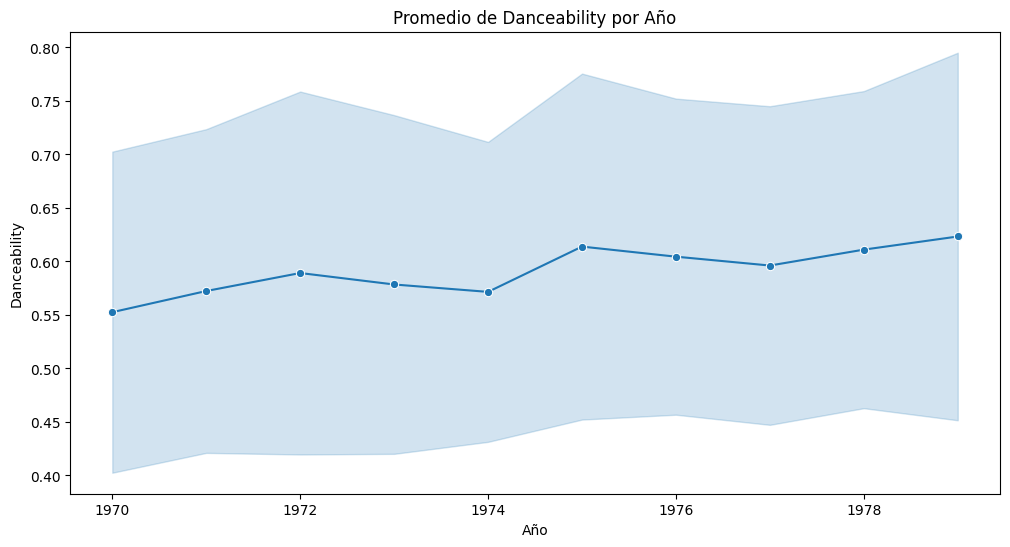

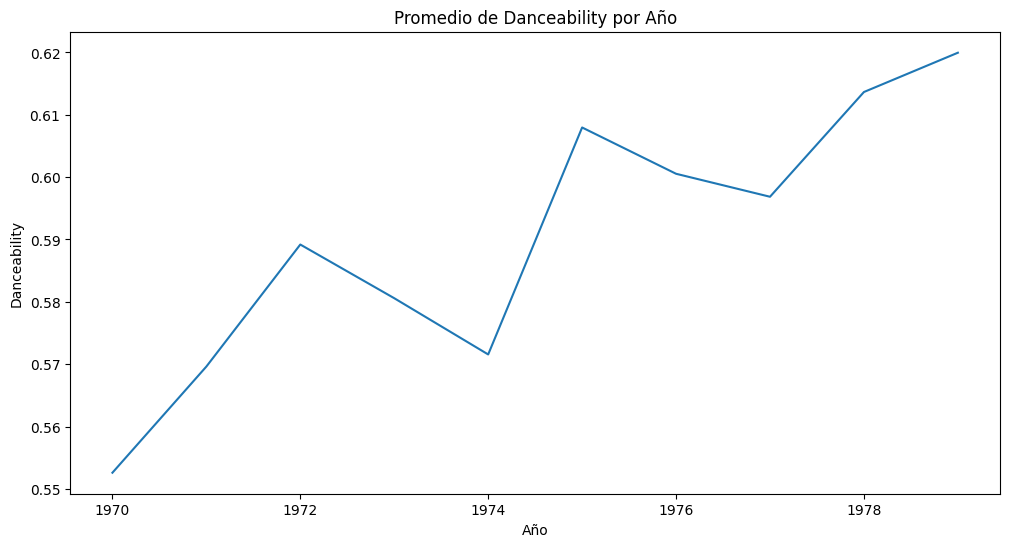

In [427]:
danceability_per_year = clean_dataset.groupby('Year')['Danceability'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Danceability', data=modified_dataset, marker='o', 
                estimator=np.mean, errorbar=('sd', 1))
plt.title('Promedio de Danceability por Año')
plt.ylabel('Danceability')
plt.xlabel('Año')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Danceability', data=danceability_per_year)
plt.title('Promedio de Danceability por Año')
plt.ylabel('Danceability')
plt.xlabel('Año')
plt.show()
